<h1>Analyse : Concevez une application au service de la santé publique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-3-:-Analyse-des-données" data-toc-modified-id="Projet-3-:-Analyse-des-données-1">Projet-3 : Analyse des données</a></span></li><li><span><a href="#IDEE-APPLICATION" data-toc-modified-id="IDEE-APPLICATION-2">IDEE APPLICATION</a></span></li><li><span><a href="#1.-Chargement-du-jeu-de-données-(dataset-en-anglais)" data-toc-modified-id="1.-Chargement-du-jeu-de-données-(dataset-en-anglais)-3">1. Chargement du jeu de données (dataset en anglais)</a></span></li><li><span><a href="#Analyse-des-dates-de-création-et-modification-des-produits" data-toc-modified-id="Analyse-des-dates-de-création-et-modification-des-produits-4">Analyse des dates de création et modification des produits</a></span></li><li><span><a href="#ANALYSE-UNIVARIEE" data-toc-modified-id="ANALYSE-UNIVARIEE-5"><strong>ANALYSE UNIVARIEE</strong></a></span><ul class="toc-item"><li><span><a href="#Quantitatives-continues" data-toc-modified-id="Quantitatives-continues-5.1">Quantitatives continues</a></span></li><li><span><a href="#Variable-quantitative-discrete" data-toc-modified-id="Variable-quantitative-discrete-5.2">Variable quantitative discrete</a></span><ul class="toc-item"><li><span><a href="#'nutrition-score-fr_100g'" data-toc-modified-id="'nutrition-score-fr_100g'-5.2.1">'nutrition-score-fr_100g'</a></span></li></ul></li><li><span><a href="#Les-variables-qualitalives" data-toc-modified-id="Les-variables-qualitalives-5.3">Les variables qualitalives</a></span><ul class="toc-item"><li><span><a href="#Variables-qualitatives-nominales" data-toc-modified-id="Variables-qualitatives-nominales-5.3.1">Variables qualitatives nominales</a></span></li><li><span><a href="#Qui-sont-les-sources-de-ces-données-?" data-toc-modified-id="Qui-sont-les-sources-de-ces-données-?-5.3.2">Qui sont les sources de ces données ?</a></span></li><li><span><a href="#Les-marques" data-toc-modified-id="Les-marques-5.3.3">Les marques</a></span></li><li><span><a href="#Catégories" data-toc-modified-id="Catégories-5.3.4">Catégories</a></span></li><li><span><a href="#Les-additifs-à-surveillées-sont-ils-des-informations-dont-nous-pourrions-disposer-?" data-toc-modified-id="Les-additifs-à-surveillées-sont-ils-des-informations-dont-nous-pourrions-disposer-?-5.3.5">Les additifs à surveillées sont ils des informations dont nous pourrions disposer ?</a></span><ul class="toc-item"><li><span><a href="#Additifs-ciblés" data-toc-modified-id="Additifs-ciblés-5.3.5.1">Additifs ciblés</a></span></li></ul></li></ul></li><li><span><a href="#Variables-qualitatives-ordinales" data-toc-modified-id="Variables-qualitatives-ordinales-5.4">Variables qualitatives ordinales</a></span><ul class="toc-item"><li><span><a href="#Répartition-des-nutrition_grades" data-toc-modified-id="Répartition-des-nutrition_grades-5.4.1">Répartition des nutrition_grades</a></span></li></ul></li></ul></li><li><span><a href="#ANALYSE-BIVARIEES" data-toc-modified-id="ANALYSE-BIVARIEES-6"><strong>ANALYSE BIVARIEES</strong></a></span><ul class="toc-item"><li><span><a href="#Les-corrélations" data-toc-modified-id="Les-corrélations-6.1">Les corrélations</a></span></li><li><span><a href="#Nutriscore-/-nutrigrade" data-toc-modified-id="Nutriscore-/-nutrigrade-6.2">Nutriscore / nutrigrade</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Nutrigrade-|-Protéines" data-toc-modified-id="Nutrigrade-|-Protéines-6.2.0.1">Nutrigrade | Protéines</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#ANALYSE-MULTIVARIEE" data-toc-modified-id="ANALYSE-MULTIVARIEE-7"><strong>ANALYSE MULTIVARIEE</strong></a></span><ul class="toc-item"><li><span><a href="#Regression-linéaire-multiple" data-toc-modified-id="Regression-linéaire-multiple-7.1">Regression linéaire multiple</a></span></li><li><span><a href="#Analyse-en-Composantes-Principales-(ACP)" data-toc-modified-id="Analyse-en-Composantes-Principales-(ACP)-7.2">Analyse en Composantes Principales (ACP)</a></span></li></ul></li></ul></div>

<a name='sommaire'>
    <img src="assets/img/combo_logo.jpg" />
</a>

# Projet-3 : Analyse des données

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sys
import warnings
import IPython as ip
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as st
from scipy.stats import t, shapiro
from scipy.stats import normaltest
import statsmodels 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
# ACP
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing


from IPython.display import display
import missingno as msno 
# Configuration pour travail avec fichier python "tools" de fonctions
%load_ext autoreload
%aimport tools
# Recharger les modules pour la conception des fichiers tools
%autoreload 1

# Set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


warnings.filterwarnings("ignore")


# IDEE APPLICATION
***
- L'application doit permettre aux personnes qui recherchent des conseils alimentaires en cas de maladie rénale chronique de trouver des informations suppleméntaires (info visuel) qui est spécifique au gens qui doivent préserver au mieux leurs reins (problème rénal).
- L'application ne remplace pas un régime spécifique fait par un professionnel de santé mais  constitue une aide à a décision par une information simplifiée concernant les indicateur qui sont importants de surveiller lorsqu'on doit surveiller son alimentation pour préserver ses reins.
***
- Objectifs : COMMENT PROTEGER MES REINS ?
    - Limiter l’apport en sel
    - Contrôler les apports en protéines,
    - Couvrir les besoins nutritionnels,
    - Conserver le plaisir de manger.
***
On surveille : 
- Le poids : alimentation saine, équilibrée et plaisir : 
    - 'nutrition-score-fr_100g','energy_100g'
    - 'fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g'
- Les indicateurs disponibles : 
    - **Sel('salt_100g')**
    - **Sodium('sodium_100g')** : sel minéral qui intervient dans l’équilibre hydrique du corps
        - 1g de sel (NaCl) équivaut à 400 mg de sodium (Na)
        - 1 gramme de sodium(Na) correspond donc à 2.5 g de sel
    - **Proteines ('proteins_100g')** : Au stade d’insuffisance rénale les besoins en protéines sont de 0,8g/Kg/j
        - en fonction du poids : 
            - -60kg => 40g
            - 60kg  => 46g
            - 70kg  => 56g
            - 80kg  => 64g
    - Le potassium est un minéral important présent dans un grand nombre d’aliments indispensables au bon fonctionnement des muscles et du coeur. : trop de données manquantes
    - **Le phosphore est surtout présent dans les aliments, lié aux protéines.**
        - La limitation protéique entraîne déjà une diminution des apports en phosphore. 
    - Limiter les additifs : 
        - E 338 Acide phosphorique (boisson au cola)
        - E 339 Phosphates de sodium
        - E 340 Phosphates de potassium
        - E 341 Phosphates de calcium
        - E 343 Phosphates de magnésium
        - E 450 Diphosphates
        - E 451 Triphosphates
        - E 452 Polyphosphates
***
**Problématique : Les données du jeu de données peuvent-elles répondre aux objectifs ?** 
***

# 1. Chargement du jeu de données (dataset en anglais)

In [2]:
# Import données
data = pd.read_csv('assets/datas/df_app_knnImputer.csv', sep='\t',parse_dates=[2,3], low_memory=False)

In [3]:
df = data.copy()
# Visualisation d'un échantillon de la population
df.sample(5)

code                     creator    created_datetime  \
12141   0018169490013             usda-ndb-import 2017-03-09 20:53:09   
160430  3020640006979  openfoodfacts-contributors 2016-12-08 07:48:09   
212156  4977972729672             usda-ndb-import 2017-03-09 13:09:56   
51010   0046675027867             usda-ndb-import 2017-03-09 11:46:27   
97913   0189270000009             usda-ndb-import 2017-03-09 11:30:48   

       last_modified_datetime                             product_name  \
12141     2017-03-09 20:53:09                           Crunch Muffins   
160430    2016-12-08 08:11:04                       Jus d'Orange douce   
212156    2017-03-09 13:09:56  Hosoda Bros. Inc., Prepared Kidney Bean   
51010     2017-03-09 11:46:28       Cereal Bowl, Vanilla Lowfat Yogurt   
97913     2017-03-09 11:30:49                       Fire Roasted Salsa   

                   brands                                      categories_fr  \
12141     Lunds & Byerlys                                            inconnu   
160430                Réa  Aliments et boissons à base de végétaux,Boisso...   
212156  Hosoda Bros. Inc.                                            inconnu   
51010            Yocrunch                                            inconnu   
97913        Salsa  Texas                                            inconnu   

       countries_fr  additives_n  \
12141    États-Unis          2.0   
160430       France          1.0   
212156   États-Unis          0.0   
51010    États-Unis          5.0   
97913    États-Unis          0.0   

                                             additives_fr  \
12141         E375 - Acide nicotinique,E101 - Riboflavine   
160430                            E300 - Acide ascorbique   
212156                                                      
51010   E300 - Acide ascorbique,E129 - Rouge allura AC...   
97913                                                       

        ingredients_from_palm_oil_n nutrition_grade_fr  \
12141                           0.0                  d   
160430                          0.0                  c   
212156                          0.0                  c   
51010                           0.0                  b   
97913                           0.0                  0   

                        main_category_fr  energy_100g  fat_100g  \
12141                            inconnu       1648.0     22.22   
160430  Jus d'orange à base de concentré        176.0      0.00   
212156                           inconnu       1088.0      0.00   
51010                            inconnu        285.0      0.75   
97913                            inconnu         75.0      0.00   

        saturated_fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
12141                 3.54               42.42        24.24        1.00   
160430                0.00                8.90         8.20        0.12   
212156                0.00               35.00        15.00        0.00   
51010                 0.38               12.78        10.53        0.00   
97913                 0.00                3.57         3.57        1.08   

        proteins_100g  salt_100g  sodium_100g  nutrition_score_fr_100g  
12141            5.05    0.89916        0.354                     14.0  
160430           0.70    0.00000        0.000                      2.0  
212156           5.00    0.10160        0.040                      3.0  
51010            3.01    0.10414        0.041                      1.0  
97913            0.00    0.95250        0.375                      1.2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240304 entries, 0 to 240303
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   code                         240304 non-null  object        
 1   creator                      240304 non-null  object        
 2   created_datetime             240304 non-null  datetime64[ns]
 3   last_modified_datetime       240304 non-null  datetime64[ns]
 4   product_name                 240304 non-null  object        
 5   brands                       240304 non-null  object        
 6   categories_fr                240304 non-null  object        
 7   countries_fr                 240304 non-null  object        
 8   additives_n                  240304 non-null  float64       
 9   additives_fr                 240304 non-null  object        
 10  ingredients_from_palm_oil_n  240304 non-null  float64       
 11  nutrition_grade_fr        

In [5]:
tools.get_description_variables(df,type_var='categ')

count  unique                     top    freq  \
code                    240304  240304           0000000004530       1   
creator                 240304    2477         usda-ndb-import  153975   
created_datetime        240304  126364     2017-03-09 10:37:09      19   
last_modified_datetime  240304  119721     2015-08-09 17:35:48      22   
product_name            240304  186889  Extra Virgin Olive Oil     192   
brands                  240304   46265                inconnue    3145   
categories_fr           240304   16277                 inconnu  178919   
countries_fr            240304      81              États-Unis  155671   
additives_fr            240304   38480                          102639   
nutrition_grade_fr      240304       6                       d   57653   
main_category_fr        240304    2322                 inconnu  178919   

                                     first                last  
code                                   NaT                 NaT  
creator                                NaT                 NaT  
created_datetime       2012-01-31 14:43:58 2017-04-20 21:13:06  
last_modified_datetime 2012-04-08 08:12:35 2017-04-21 00:53:41  
product_name                           NaT                 NaT  
brands                                 NaT                 NaT  
categories_fr                          NaT                 NaT  
countries_fr                           NaT                 NaT  
additives_fr                           NaT                 NaT  
nutrition_grade_fr                     NaT                 NaT  
main_category_fr                       NaT                 NaT

In [6]:
tools.get_description_variables(df,type_var='num')

count         mean         std   min  \
additives_n                  240304.0     1.787436    2.464454   0.0   
ingredients_from_palm_oil_n  240304.0     0.017582    0.133063   0.0   
energy_100g                  240304.0  1123.056095  786.012530   0.0   
fat_100g                     240304.0    12.054291   16.700297   0.0   
saturated_fat_100g           240304.0     4.614094    7.549919   0.0   
carbohydrates_100g           240304.0    31.203502   28.476440   0.0   
sugars_100g                  240304.0    15.283422   20.688020   0.0   
fiber_100g                   240304.0     2.435193    4.211174   0.0   
proteins_100g                240304.0     7.113039    8.106444   0.0   
salt_100g                    240304.0     1.592437    6.193162   0.0   
sodium_100g                  240304.0     0.626730    2.436071   0.0   
nutrition_score_fr_100g      240304.0     8.959197    8.787331 -15.0   

                                   25%         50%         75%          max  
additives_n                    0.00000     1.00000     3.00000    31.000000  
ingredients_from_palm_oil_n    0.00000     0.00000     0.00000     2.000000  
energy_100g                  389.00000  1100.00000  1674.00000  3776.000000  
fat_100g                       0.00000     4.60000    19.00000   100.000000  
saturated_fat_100g             0.00000     1.25000     6.67000   100.000000  
carbohydrates_100g             6.45000    20.00000    56.76000   100.000000  
sugars_100g                    1.01000     5.10000    22.58000   100.000000  
fiber_100g                     0.00000     1.02000     3.30000   100.000000  
proteins_100g                  0.71000     4.88000    10.00000   100.000000  
salt_100g                      0.06858     0.59182     1.37414   100.000000  
sodium_100g                    0.02700     0.23300     0.54300    39.370079  
nutrition_score_fr_100g        1.00000     9.00000    15.80000    40.000000

# Analyse des dates de création et modification des produits

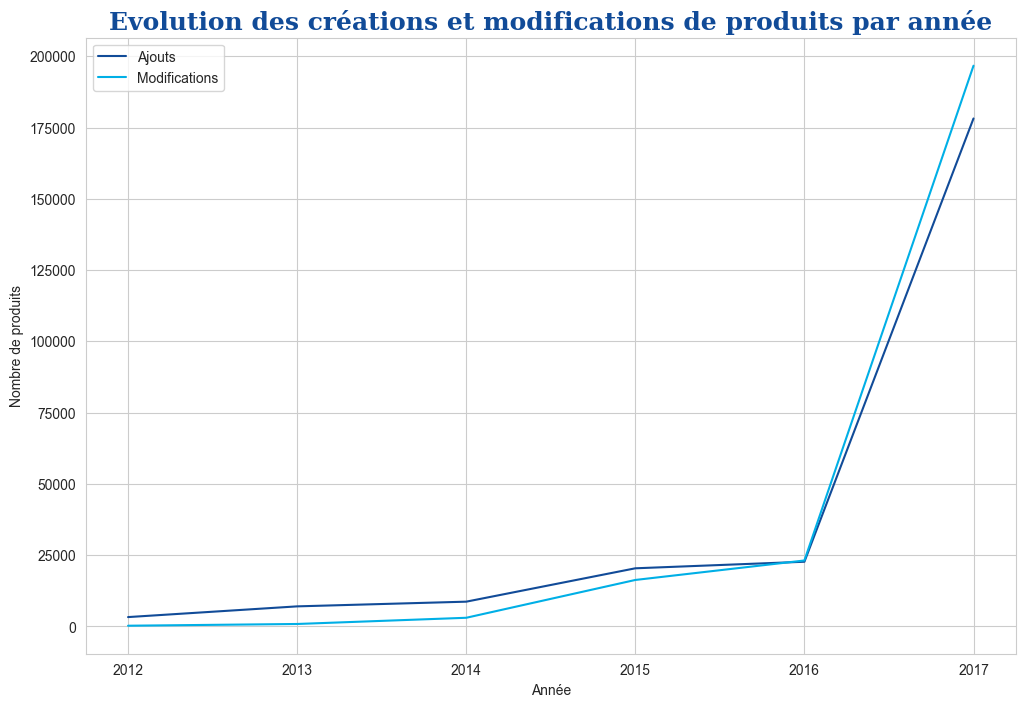

In [7]:
add_per_year = df['code'].groupby(by=df['created_datetime'].dt.year).nunique()
modified_per_year = df['code'].groupby(by=df['last_modified_datetime'].dt.year).nunique()

fig=plt.figure(figsize=(12,8))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.set_style("whitegrid")
plt.plot(add_per_year, 
         color="#114b98", 
         label="Ajouts")
plt.plot(modified_per_year, 
         color="#00afe6", 
         label="Modifications")
plt.title("Evolution des créations et modifications de produits par année", 
          fontdict=font_title)
plt.xlabel("Année")
plt.ylabel("Nombre de produits")
plt.legend()
plt.savefig("assets/graphiques/Evolutions_dates.jpg")

plt.show()

- Quelle que soit les valeurs faisant référence aux dates : on observe un augmentation significative dans les années 2015-2017 
- **created_t = created_datetime**
- **last_modified-t = last_modified_datetime**
- created_t dispose d'information remontant à 1970 : 01/01/1970 est une erreur car c'est la seule et la date est antérieur au projet 
- **Explication des dates** : 
    - Le Nutri-Score est prévu dans la **loi de 2016 en France**
    - **Mis en place en France en 2017**, l'étiquetage nutritionnel Nutri-Score s'applique aujourd'hui dans sept pays

# **ANALYSE UNIVARIEE**

In [8]:
float_columns  = df.select_dtypes(include=['float64']).columns.to_list()
object_columns = df.select_dtypes(include=['object']).columns.to_list()
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.to_list()

In [9]:
# On écarte les dates
# Variables numériques
cols_num = df.select_dtypes(include=[np.number]).columns.to_list()
# Variables quantitatives discrètes
cols_quant_discr = ['additives_n','ingredients_from_palm_oil_n','nutriscore_score_fr']
# Variables quantitatives continue
cols_quant_cont = ['energy_100g', 'fat_100g','saturated_fat_100g', 
                   'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                   'proteins_100g', 'salt_100g', 'sodium_100g']

## Quantitatives continues

In [10]:
# Mesures de tendances centrales des colonnes quantitatives continues
tools.stat_descriptives(df,cols_quant_cont)

**Si γ1=0 alors la distribution est symétrique.**

**Si γ1>0 alors la distribution est étalée à droite.**

**Si γ1<0 alors la distribution est étalée à gauche.**

In [11]:
def var_hist(var, i):
    subset = df[var]
    n_df_valide = len(df)
    xbar = np.mean(df[var]) # Moyenne
    sprime = np.std(df[var], ddof=1) # Ecart-type
    sprime2 = np.var(df[var], ddof=1) #Variance non biaisée
    
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(df[var].min(),df[var].max(),0.05)
    y = st.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

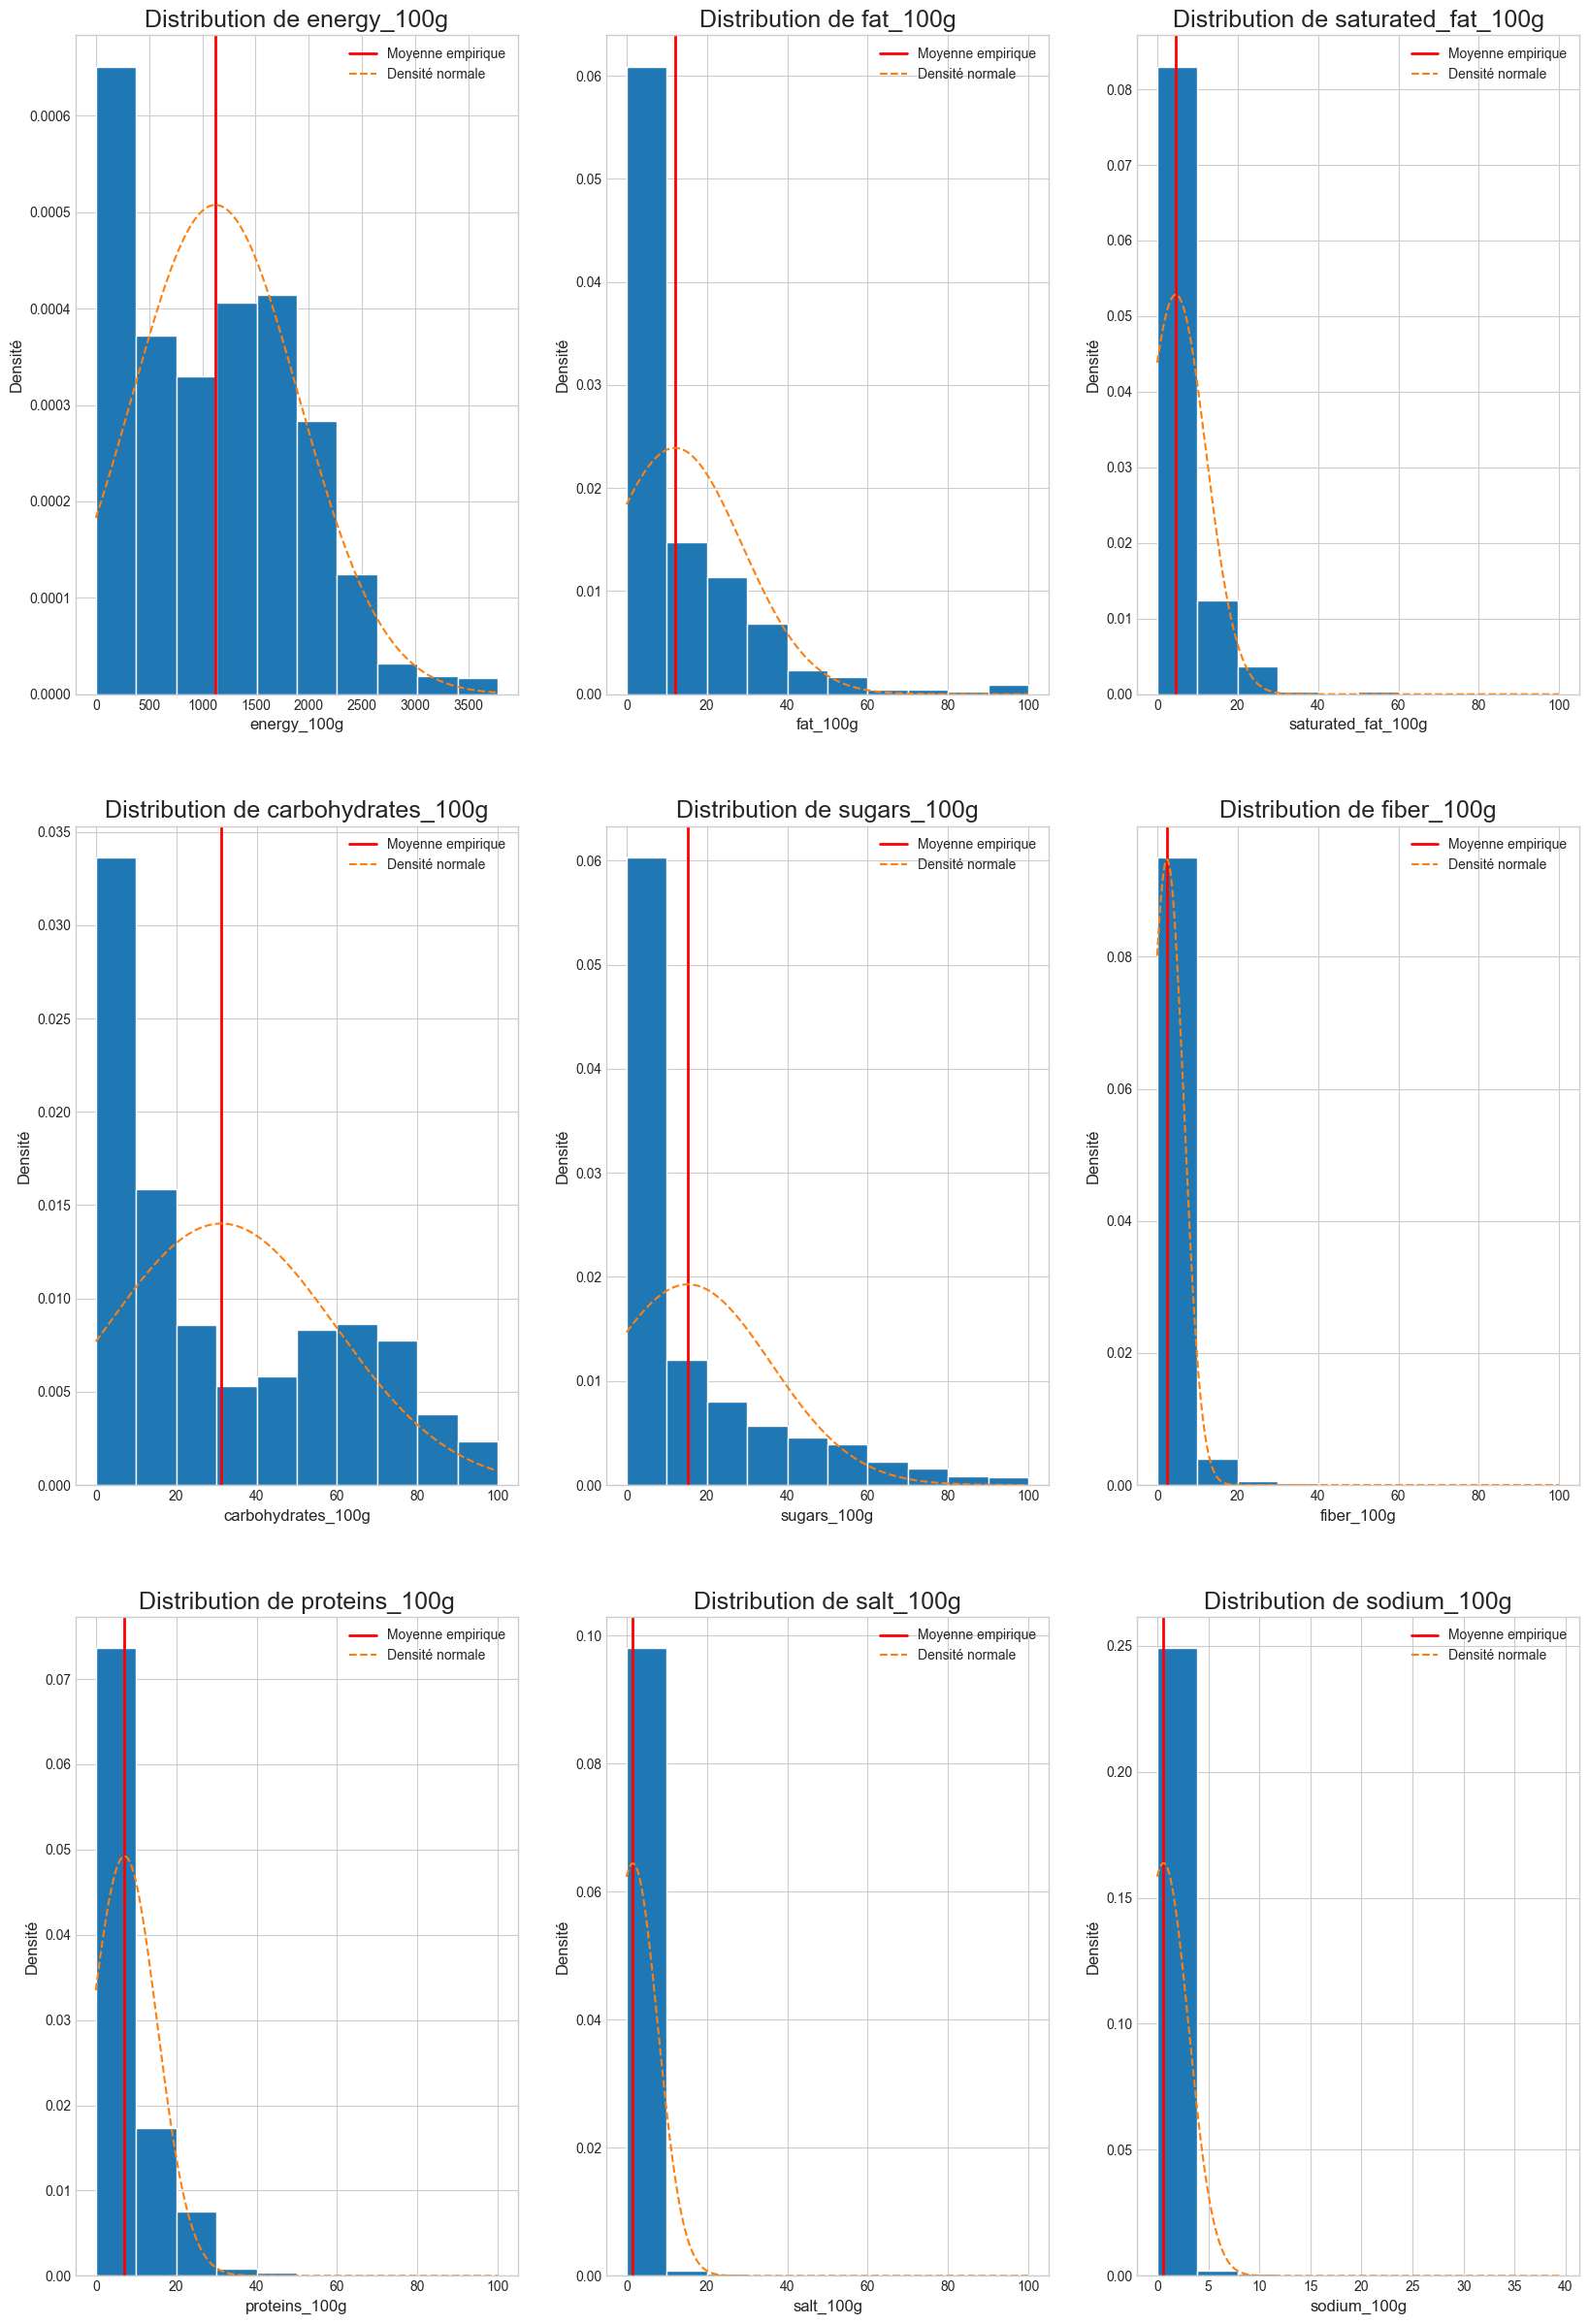

In [12]:
liste_var = cols_quant_cont
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 331
for var in liste_var :
    var_hist(var, i)
    i+=1
plt.savefig("assets/graphiques/analyse univariee histo_dfComplet.jpg")

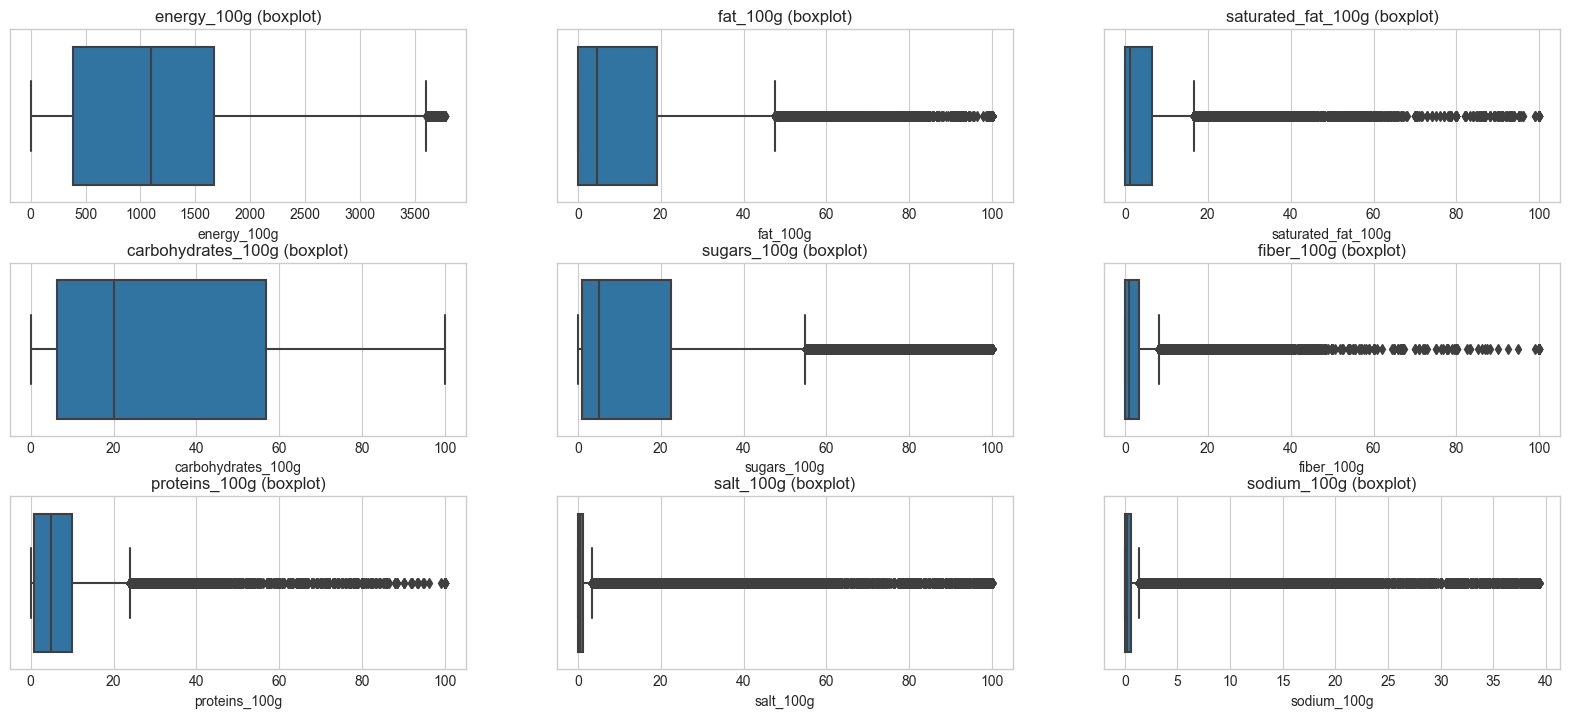

In [13]:
# Representation graphique des outliers:
a = 3  # nombre de lignes
b = 3  # nombre de colonnes
c = 1  # initialisation
fig = plt.figure(figsize=(20,8))

for i in df.loc[:, cols_quant_cont]: # pour toute les colonnnes quantatives
    plt.subplot(a, b, c) # maillage des subplot
    plt.title('{} (boxplot)'.format(i, a, b, c))# titres des box plot
    plt.xlabel(i) # xlabel = nom de la colonne
    sns.boxplot(x = df[i]) # faire un boxplot sns
    c = c + 1 # incrementation ==> création d'un nouveau box plot
plt.subplots_adjust(left=0.125, # gerer les espacements
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

ANALYSE :

## Variable quantitative discrete

### 'nutrition-score-fr_100g'

In [14]:
# On s'occupe ici uniquement des nutrigrades complétés
df_nutri = df[~(df['nutrition_grade_fr']=='0')]
# On s'occupe ici uniquement des nutrigrades complétés
df_nutriscore = df[~(df['nutrition_score_fr_100g']=='0')]
df_nutriscore = df_nutriscore[~(df_nutriscore['nutrition_grade_fr']=='0')] 

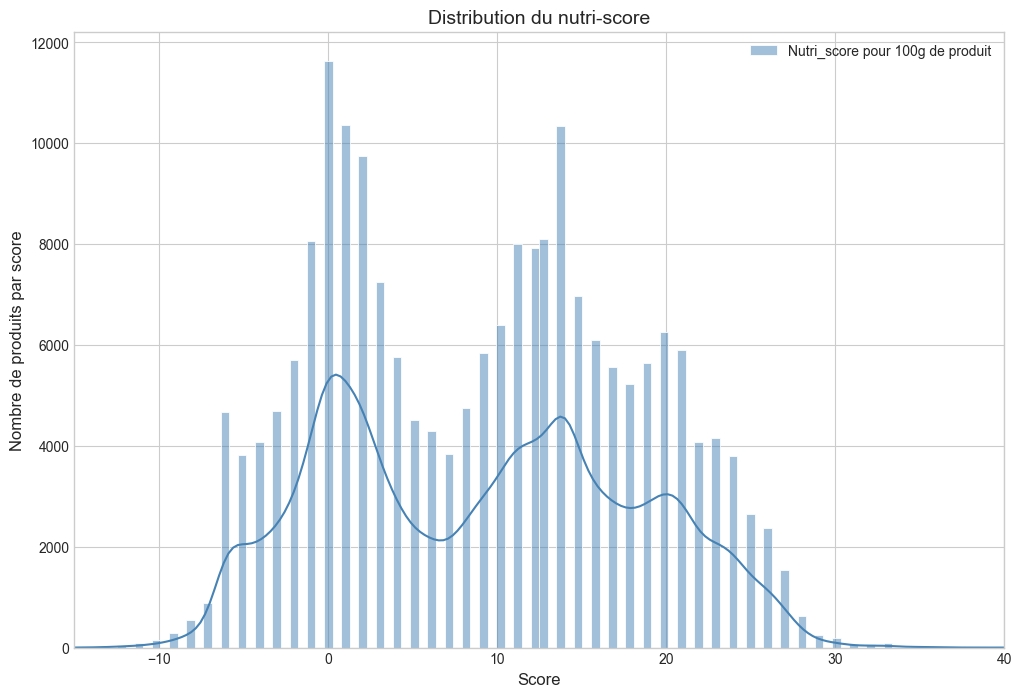

In [15]:
# Courbe de distribution du nutriscore
plt.figure(figsize=(12, 8))

sns.histplot(df_nutriscore['nutrition_score_fr_100g'], kde=True,
             color='SteelBlue', label='Nutri_score pour 100g de produit')
plt.title("Distribution du nutri-score", fontsize=14)
plt.xlim(-15, 40)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Nombre de produits par score', fontsize=12)
plt.legend()
plt.show()

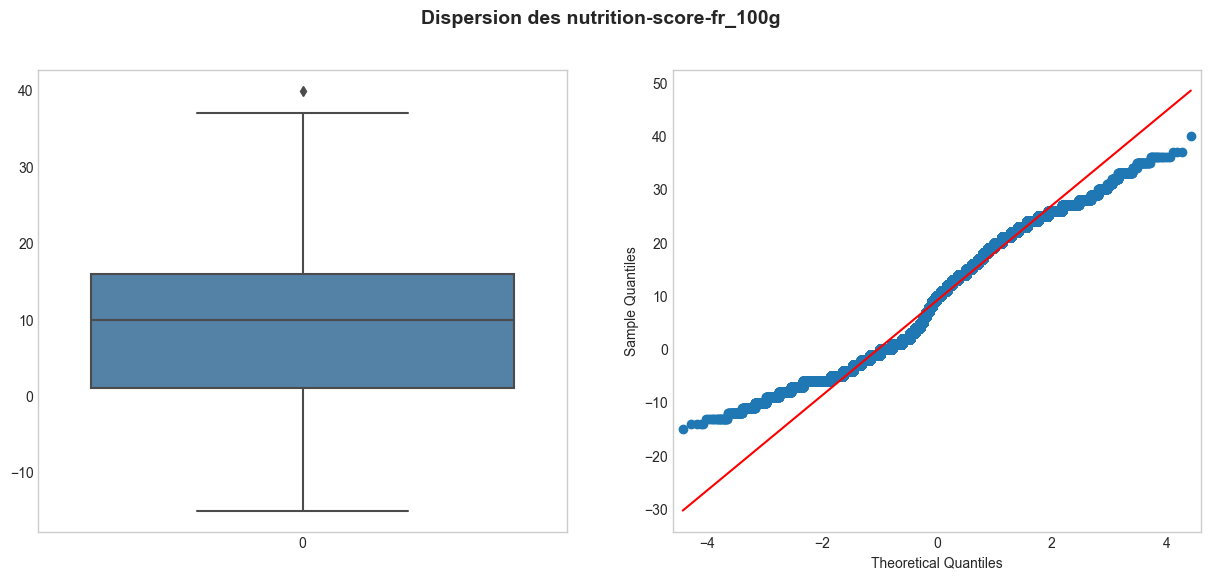

In [16]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1, 2, 1)
box = sns.boxplot(data=df_nutri['nutrition_score_fr_100g'], color='SteelBlue', ax=ax1)
# box.set(ylabel=unite)

plt.grid(False)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sm.qqplot(df_nutri['nutrition_score_fr_100g'],
             line='r', ax=ax2)
plt.grid(False)

fig.suptitle('Dispersion des nutrition-score-fr_100g', fontweight='bold', size=14)
plt.show()


In [17]:
col = ['nutrition_score_fr_100g']
tools.stat_descriptives(df_nutri,col)

In [18]:
# définition des bacs
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IntervalIndex.from_tuples.html
liste_bins = pd.IntervalIndex.from_tuples(
    [(-15, -1), (0, 2), (3, 10), (10, 18), (19, 40)])
tools.distribution_variables_plages_perc_donnees(df_nutri,'nutrition_score_fr_100g',liste_bins)

Bilan A COMPLETER
***
- La distribution est , ce qui correspond .
- La distribution semble non normale surtout pour les produits de tête et de fin.
- La moyenne et la médiane sont autour d'un score de .
- L'amplitude est de -15 à 40 donc tous les nutri-scores sont représentés.
- Le nutri-score  est majoritaire  et la majorité des produits d'Open Food Facts ont 

## Les variables qualitalives

In [19]:
# On visualise le nombre de valeurs uniques contenu dans les colonnes de type object
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].nunique()}')

code---------------------------------------------- 240304
creator------------------------------------------- 2477
product_name-------------------------------------- 186889
brands-------------------------------------------- 46265
categories_fr------------------------------------- 16277
countries_fr-------------------------------------- 81
additives_fr-------------------------------------- 38480
nutrition_grade_fr-------------------------------- 6
main_category_fr---------------------------------- 2322


### Variables qualitatives nominales

In [20]:
# Variables qualitatives ou modalités
# Variables qualitatives nominales
cols_qual_nom = ['code','creator','product_name','brands', 
                 'categories_fr','main_category_fr', 'countries_fr','additives_fr']

In [21]:
def top_N_pie (df,var,name,n,taille,perc) : 
    ''' 
    Fonction qui visualise les n plus grand d'une colonne avec ou sans pourcentage
    parametres : 
        df
        var : colonne ciblée
        name : 'nom de la colonne '
        n : nombre de top voulu
        taille : taille du pieplot
        per : si True : affiche les pourcentages
    '''
    target = df.groupby(by=var)['code'].nunique().sort_values(ascending=False)
    # Graphiques top N
    
    fig, ax = plt.subplots(figsize=(taille, taille), subplot_kw=dict(aspect="equal"))
    explodes = np.zeros(n)
    explodes[0] = .1
    # calcul des pourcentages
    if perc: 
        def pct_tot(pct):
            tot = round(pct*target[:n].sum(),0)
            tot_pct = tot/target.sum()
            return "{:.1f}%\n({:.0f})".format(tot_pct,(tot/100))
        plt.pie(target[:n], labels=target[:n].index,
            startangle=45,
            shadow=True,
            autopct=lambda pct: pct_tot(pct),
            explode=explodes,
            textprops=dict(color="black",size=12, weight="bold"))
    else : 
        plt.pie(target[:n], labels=target[:n].index,
                startangle=45,
                shadow=True,
                explode=explodes,
                textprops=dict(color="black",size=10, weight="bold"))
    plt.title(f"TOP {n} : {name}",fontweight='bold',fontsize=24)
    plt.show()

### Qui sont les sources de ces données ?

In [22]:
# Nombre de créateurs, sources des données
print(f"Nombre de sources unique : {df['creator'].nunique()}")

Nombre de sources unique : 2477


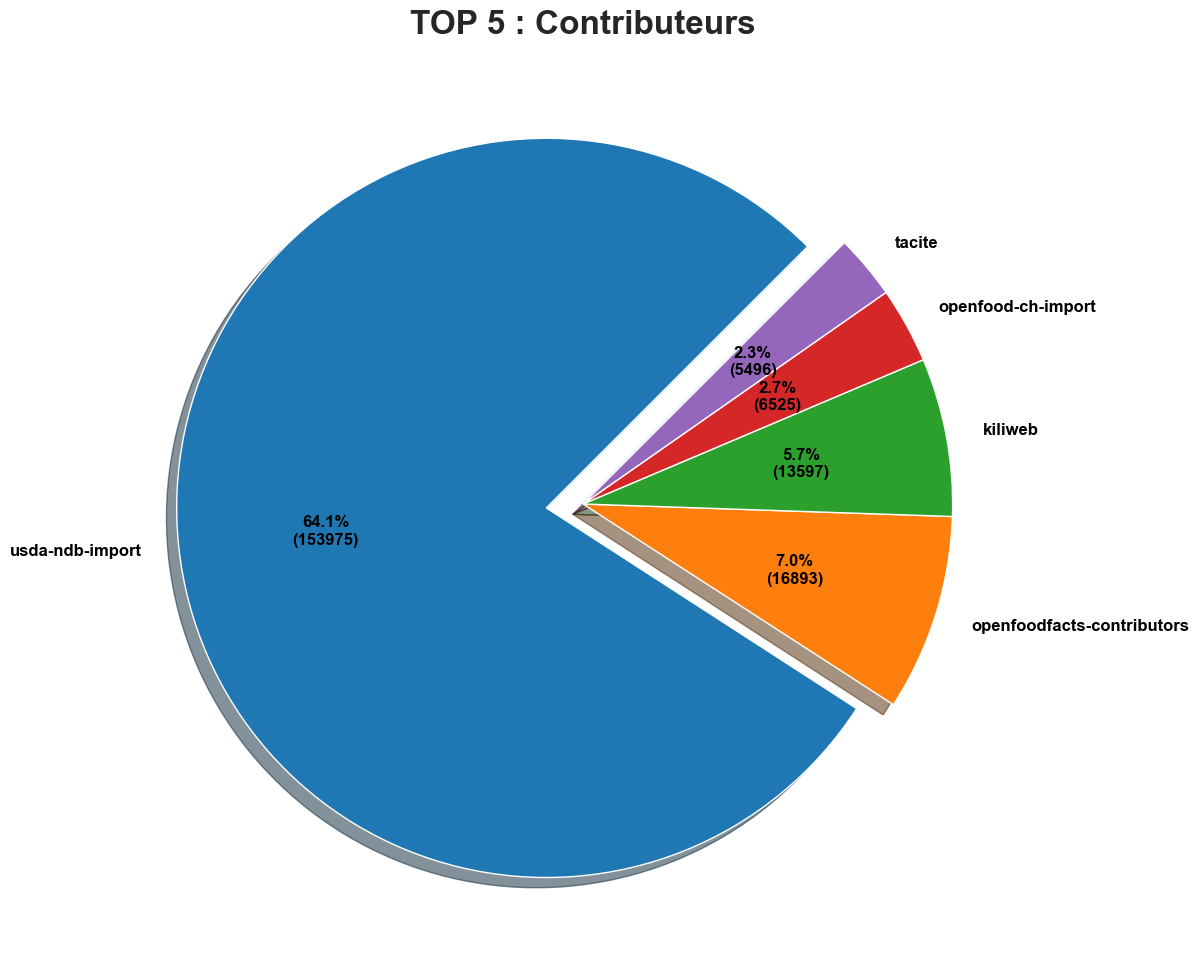

<Figure size 640x480 with 0 Axes>

In [23]:
top_N_pie(df,'creator','Contributeurs',5,12,True)
plt.savefig("assets/graphiques/Top_Contributeurs.jpg")

- 2478 contributeurs dont des institutions internationales mais aussi des particuliers
- **La question de la fiabilité des données se pose** dès les 6 plus gros contributeurs
    - La majorité des données provient de l'USDA : Misitère de l'agriculture américain : https://www.usda.gov/topics/trade/importing-goods
    - openfoodfacts-contributors : Communauté de contributeurs : https://world.openfoodfacts.org/contribute
    - kiliweb : ??
    - openfood-ch-import : sûrement une instition suisse mais pas de certitudes
    - date-limie-app : ??
    - Tacite : contributeur pernonnel ?

### Les marques
- Trouve t-on dans le jeu de données les marques qui sont présentent sur le marché français, consommateurs cible de notre application ?

In [24]:
df['brands'].nunique()

46265

In [25]:
# On s'occupe ici uniquement des catégories renseignées
df_brands = df[~(df['brands']=='inconnue')]
df_brands.shape

(237159, 23)

In [26]:
# Tableau fréquences
dico = df_brands.groupby('brands')['brands'].count().sort_values(ascending=False).to_dict()
nom = 'brands'
col1 = 'Nom_' + nom
col2 = 'Nbr_' + nom
col3 = 'Fréquence (%)'
df_gpe = pd.DataFrame(dico.items(), columns=[col1, col2])
df_gpe[col3] = (df_gpe[col2] * 100) / len(df_brands)
df_gpe.head(10)

Nom_brands  Nbr_brands  Fréquence (%)
0     Carrefour        2362       0.995956
1        Auchan        1768       0.745491
2        Meijer        1702       0.717662
3             U        1681       0.708807
4        Kroger        1454       0.613091
5  Leader Price        1372       0.578515
6        Casino        1233       0.519904
7         Ahold        1181       0.497978
8      Roundy's        1112       0.468884
9       Spartan        1063       0.448223

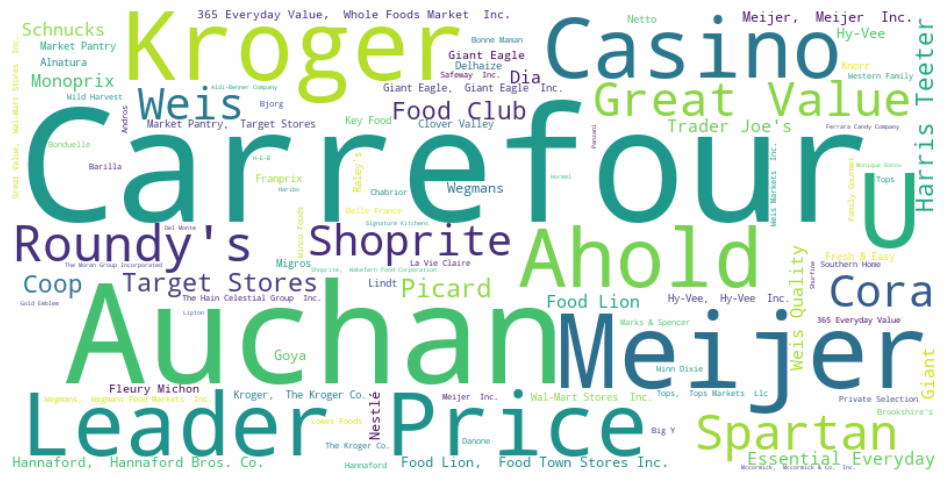

In [27]:
# Wordecloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=400, background_color="white",max_words=100).generate_from_frequencies(dico)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Sur 46265 marques différentes dans le df
    - 237159 produit non renseignés : 'inconnues'
- **Les marques disponibles en France sont bien représentées** : 
- Carrefour, Auchan, Leader Price, U, Casino, Monoprix, Picard, Bjorg, Nestlé, Lipton, Cora, Harris... sont des marques populaires en France 

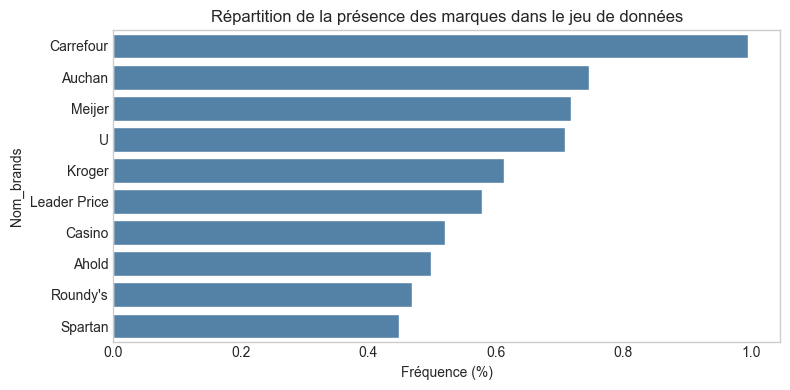

In [28]:
 df_gp_red = df_gpe.head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(
    y=df_gp_red[col1],
    x=df_gp_red[col3],
    data=df_gp_red,
    color='SteelBlue')
plt.title('Répartition de la présence des marques dans le jeu de données')
plt.grid(False)
plt.tight_layout()
plt.show()

### Catégories

In [29]:
df['categories_fr'].nunique()

16277

In [30]:
# On s'occupe ici uniquement des catégories renseignées
df_categ = df[~(df['categories_fr']=='inconnu')]

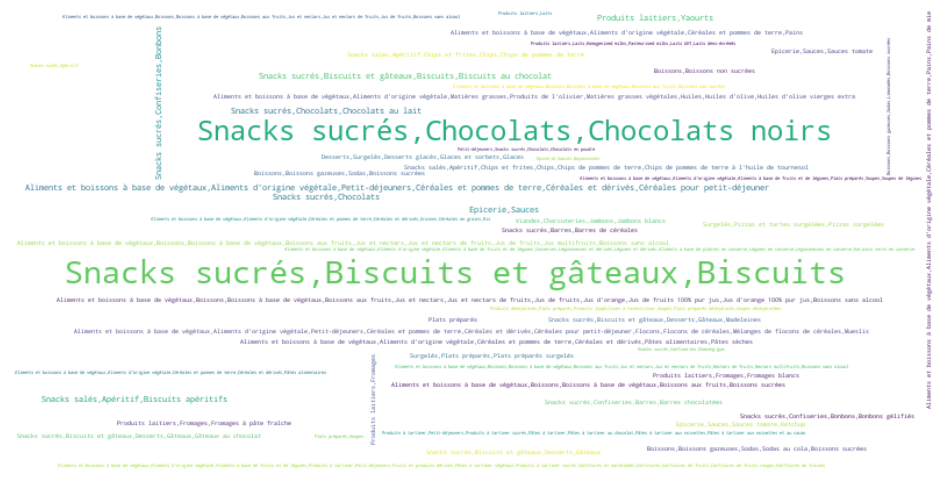

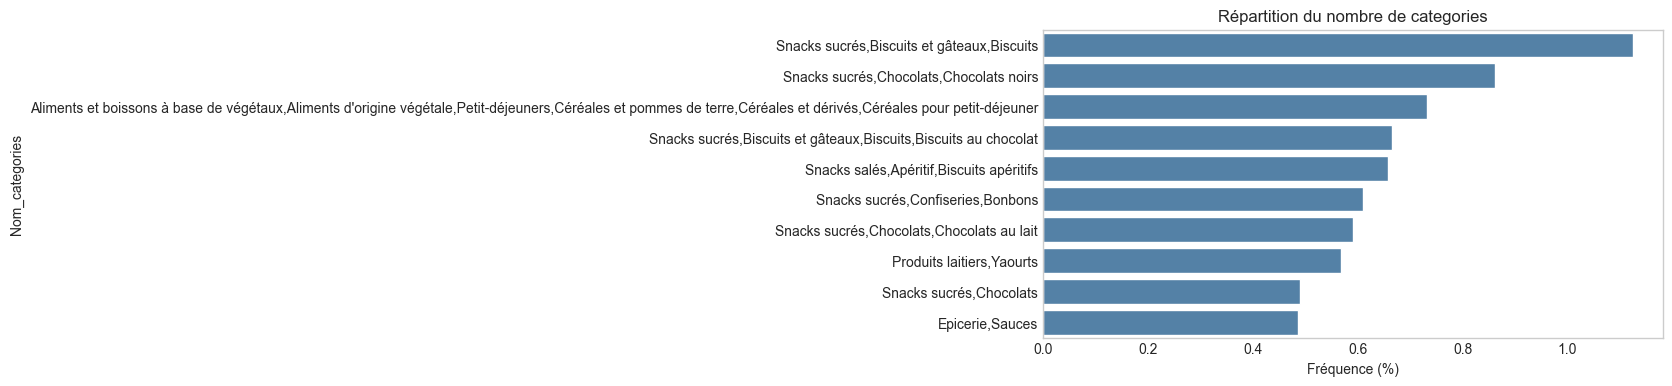

In [31]:
tools.affiche_wordcloud_tabfreq(df_categ,'categories_fr','categories',)

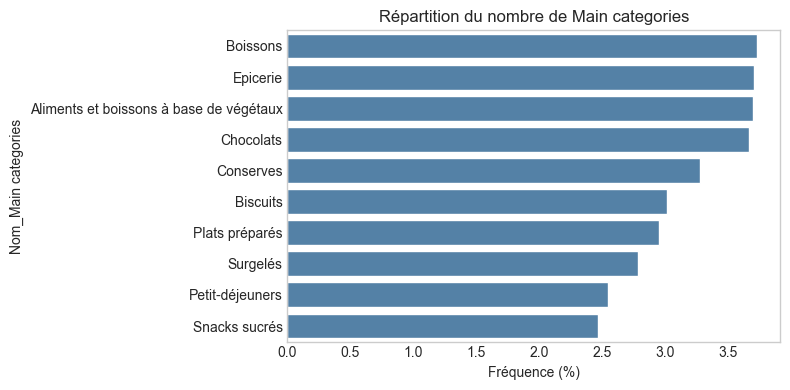

In [32]:
tools.affiche_wordcloud_tabfreq(df_categ,'main_category_fr','Main categories',affword=False)

- Parmi les **catégories les plus représentés ont retrouve beaucoup de produits considérés comme a surveiller dans une alimentation saine**. 
- A défaut d'une sur représentation des produits sain **on peut exploiter ces informationspour informer le consommateur sur les produits à surveiller**. Une bonne alimentation passe aussi par le plaisir et ne doit pas être stigmatisé sans avis médical personnalisé contraire. 

- Pour notre appli cette source de données est importantes et l'application devra signaler les choses de manière pédagogique
    - Alimentation : interdite par le medecin
    - alimentation : apport à surveiller
    - alimentation : recommandé

### Les additifs à surveillées sont ils des informations dont nous pourrions disposer ?

***
#### Additifs ciblés
***
 - Limiter les additifs : 
        - E 338 Acide phosphorique (boisson au cola)
        - E 339 Phosphates de sodium
        - E 340 Phosphates de potassium
        - E 341 Phosphates de calcium
        - E 343 Phosphates de magnésium
        - E 450 Diphosphates
        - E 451 Triphosphates
        - E 452 Polyphosphates

In [33]:
# On s'occupe ici uniquement des catégories renseignées
df_additives = df[~(df['additives_fr']==' ')]

In [34]:
df_additives_target = df_additives.copy()
df_additives_target = df_additives_target[df_additives_target['additives_fr'].str.contains("338|339|340|341|343|450|451|452")]

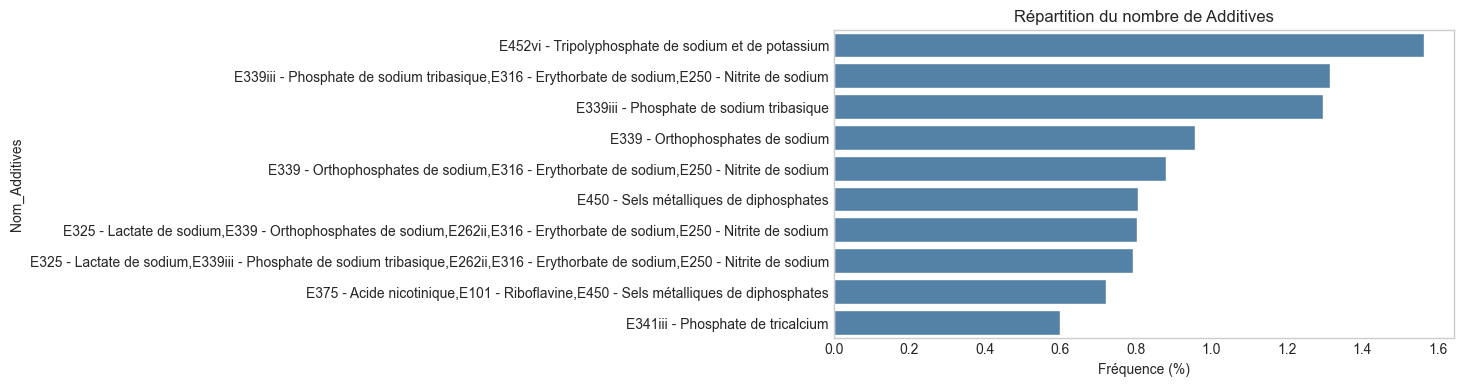

In [35]:
tools.affiche_wordcloud_tabfreq(df_additives_target,'additives_fr','Additives',affword=False)

<div class="alert alert-block alert-success">
        Les addfitifs que nous ciblons sont dans la base de données
</div>


- **Les addfitifs que nous ciblons sont dans la base de données**

## Variables qualitatives ordinales

In [36]:
# Variables qualitatives ordinales
cols_qual_ord = ['nutriscore_grade_fr']

### Répartition des nutrition_grades

In [37]:
# On s'occupe ici uniquement des nutrigrades complétés
df_nutri = df[~(df['nutrition_grade_fr']=='0')]

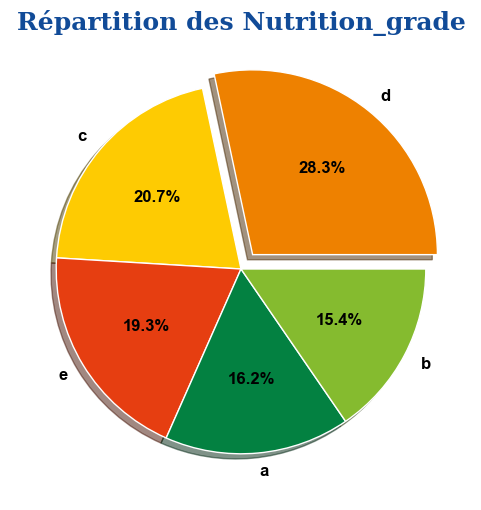

In [38]:
nutrition_grade = df_nutri.groupby(by='nutrition_grade_fr')['code'].nunique().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
explodes = np.zeros(5)
explodes[0] = .1

plt.pie(nutrition_grade, labels=nutrition_grade.index, 
        startangle=0, 
        colors=['#ee8100','#fecb02','#e63e11','#038141','#85bb2f'],
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des Nutrition_grade", fontdict=font_title)
plt.savefig("assets/graphiques/Répartion_nutrigrdes.jpg")
plt.show()

**Tous les nutrigrades sont représentés** avec beaucoup de produits appartenant aus **groupes 'd'et 'e' représentant 47% des produits** de la base 

Définition : que signifie le Nutri-Score ?

Conçu dans le cadre du Programme National Nutrition Santé, le Nutri-Score est une échelle graphique qui classe de A à E les produits alimentaires en fonction de leurs qualités nutritionnelles. Le système retenu se base ainsi sur un code à 5 couleurs : du vert pour les produits équilibrés, du rouge pour les aliments trop gras ou trop sucrés et trois couleurs intermédiaires (vert clair, jaune et orange).

► Les aliments classés A sont les plus favorables sur le plan nutritionnel car il s'agit de nutriments et d'aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d'olive),

► Les aliments classés E ont une moins bonne qualité nutritionnelle car ils contiennent des nutriments à limiter (énergie, acides gras saturés, sucres, sel).

Il s'agit de l'étiquetage nutritionnel officiel recommandé en France. Mis au point par des équipes de recherches internationales, synthétique, compréhensible et fondé sur des bases scientifiques, ce logo fournit une information immédiate au consommateur sur la qualité nutritionnelle des produits qu'il achète afin de l'aider à faire facilement les bons choix dans les rayons des supermarchés. 

   # **ANALYSE BIVARIEES**

## Les corrélations

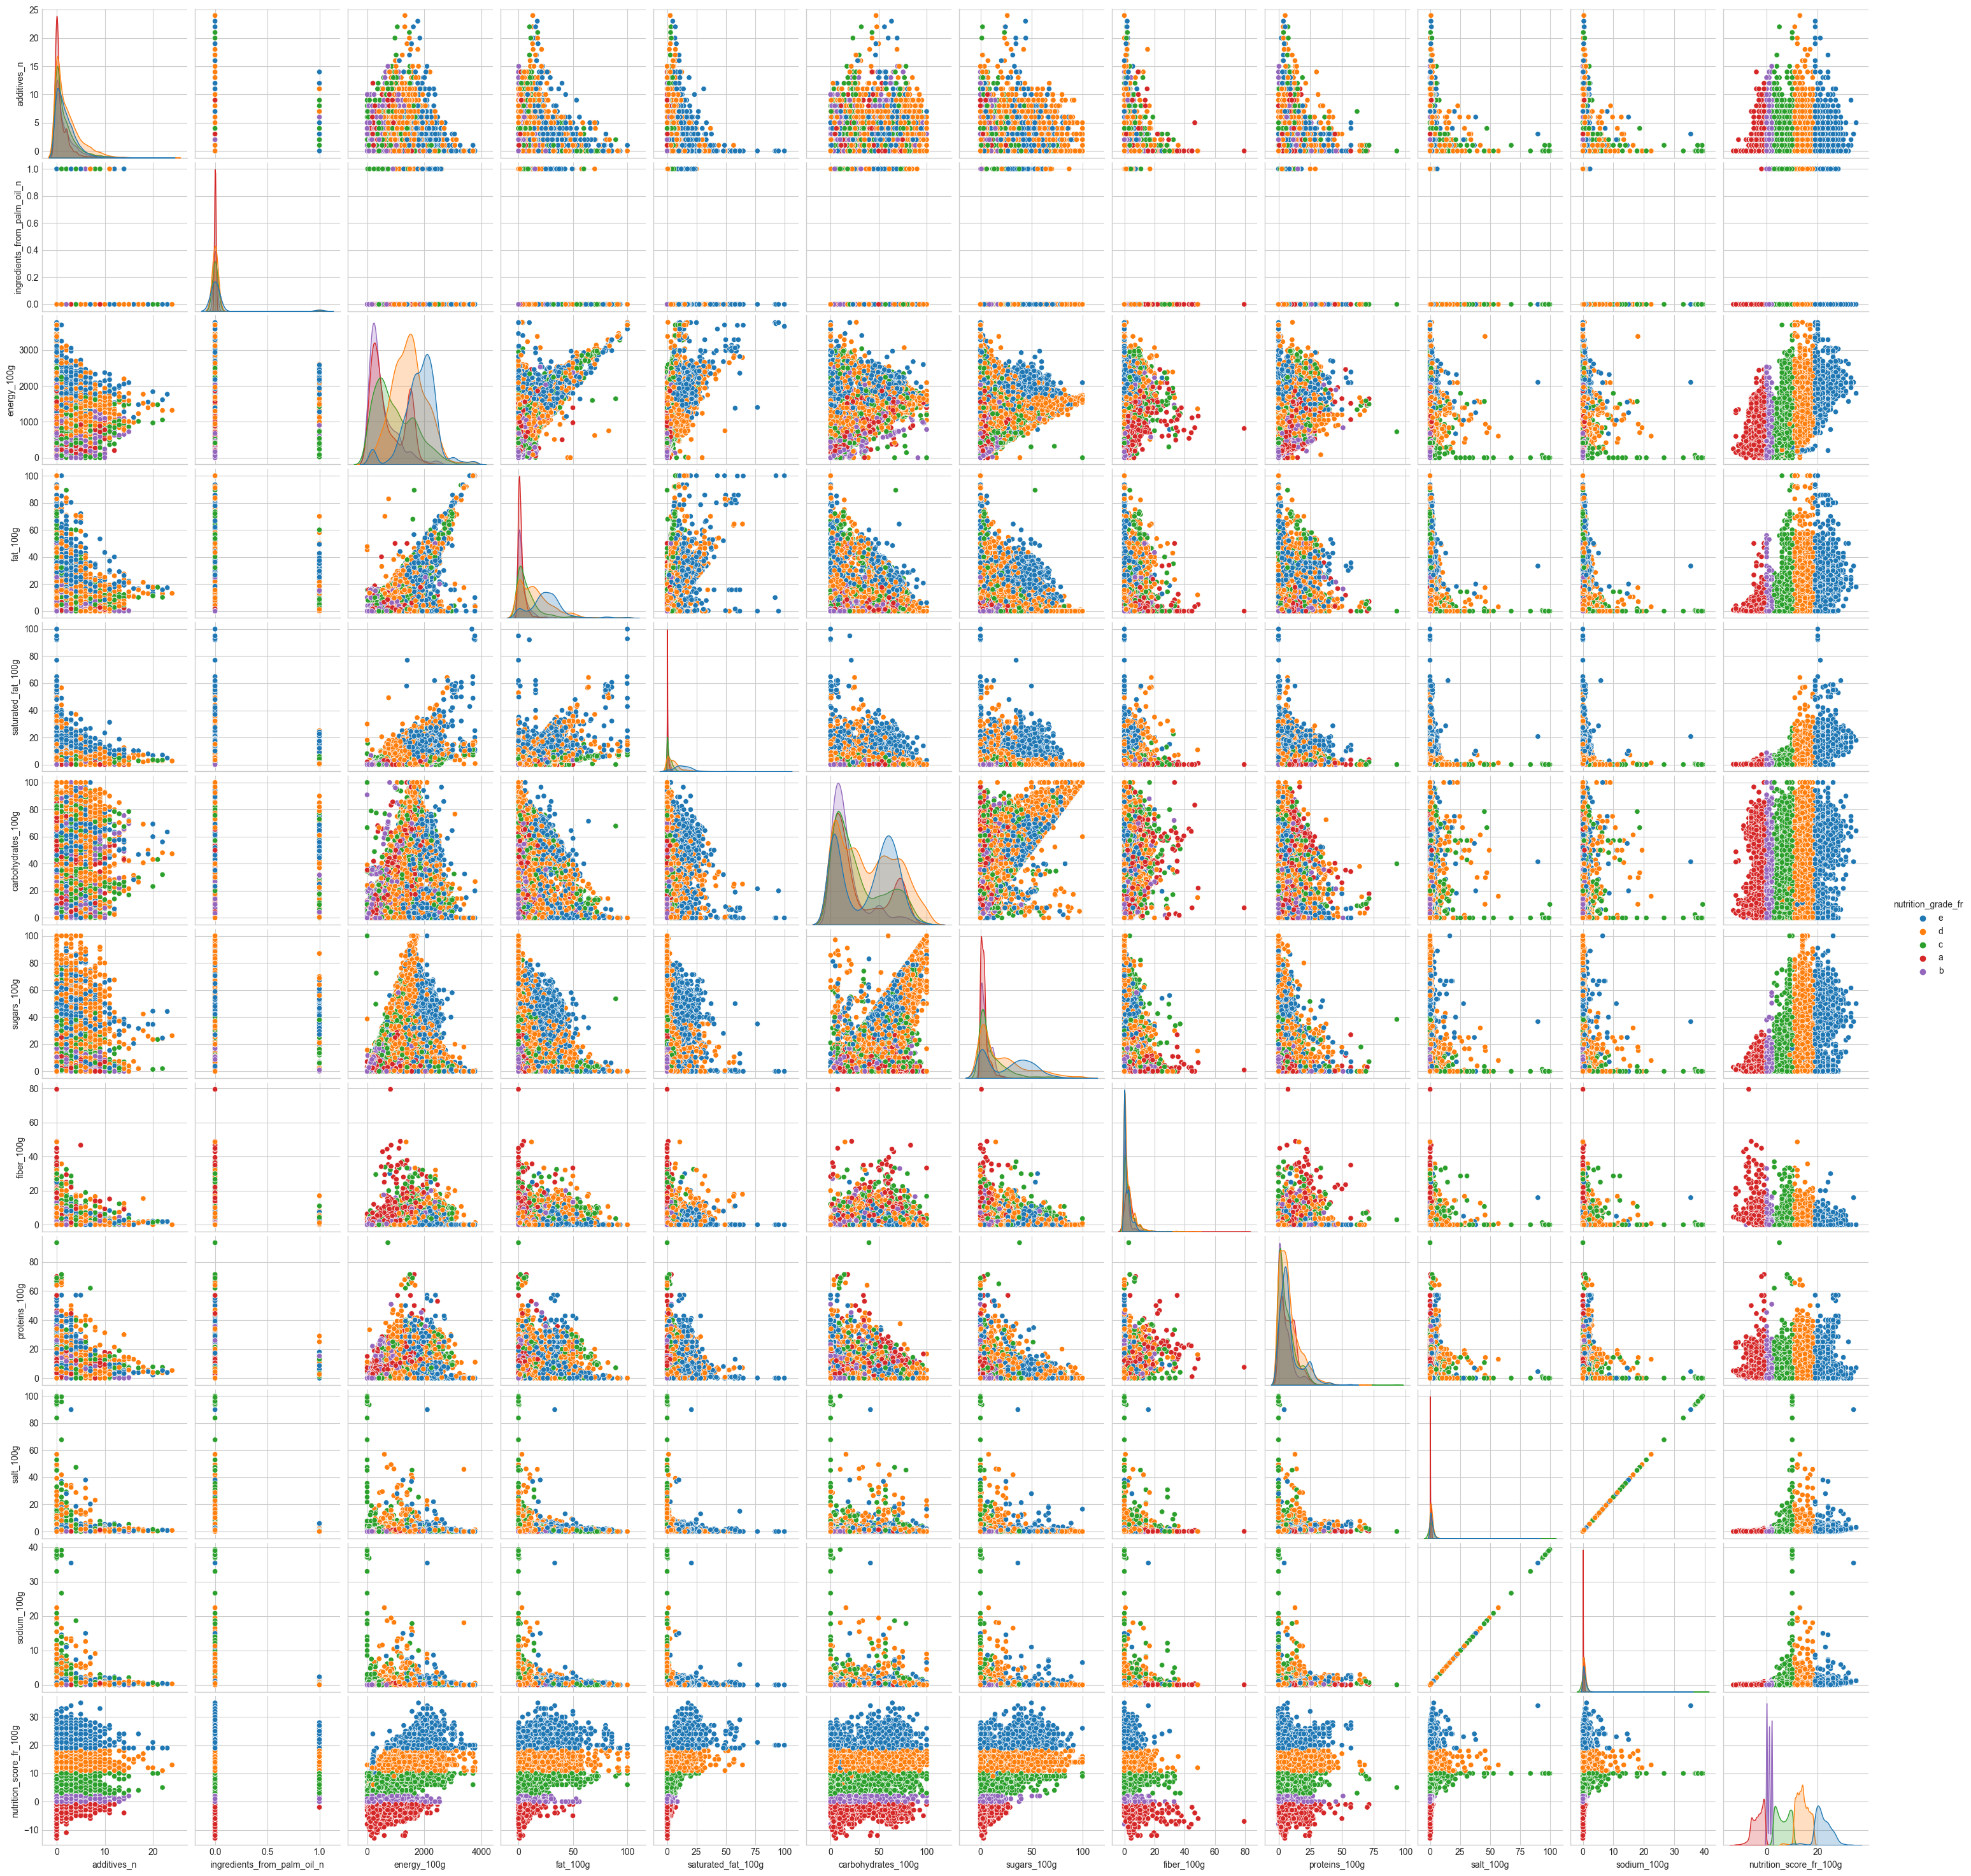

In [39]:
sns.pairplot(df_nutri.sample(frac=0.05), hue="nutrition_grade_fr")
plt.savefig("assets/graphiques/Pairplot_Nutrition grade.jpg")

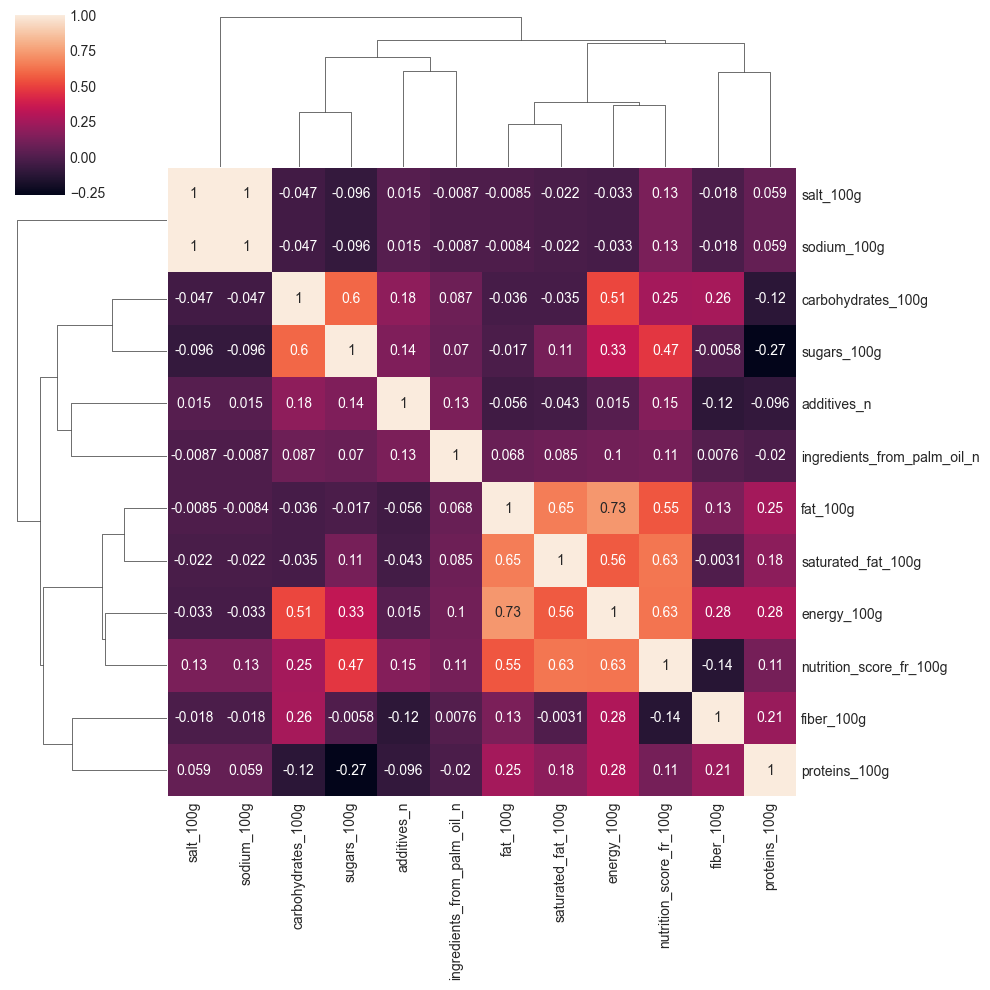

In [40]:
sns.clustermap(df_nutri.corr(),annot=True)

**Bilan**
***
- On observe des correlations entre le nutrigrade et les autres variables interressantes pour l'application
- Certaines variables sont très corrélées : 
    - Cette matrice des corrélations ne nous apporte pas rééllement d'informations mais confirme mathématiquement des éléments logiques : salt_100g est très fortement corrélé avec sodium_100g, fat_100g avec satured-fat_100g... Il faudra cependant tenir compte de ces fortes corrélation dans nos modèles, la colinéarité dégradant les performances.

## Nutriscore / nutrigrade

In [53]:
# On s'occupe ici uniquement des nutrigrades et nutriscore complétés
df_nutriscore = df[~(df['nutrition_score_fr_100g']=='0')]
df_nutriscore = df_nutriscore[~(df_nutriscore['nutrition_grade_fr']=='0')] 

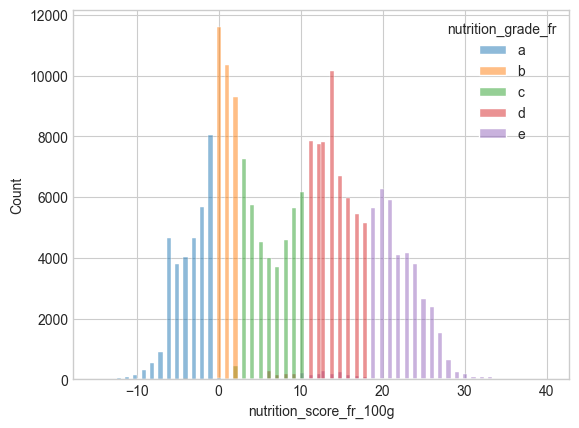

In [54]:
# graph
sns.histplot(data=df_nutriscore.sort_values("nutrition_grade_fr"), x="nutrition_score_fr_100g", hue="nutrition_grade_fr")
plt.show()

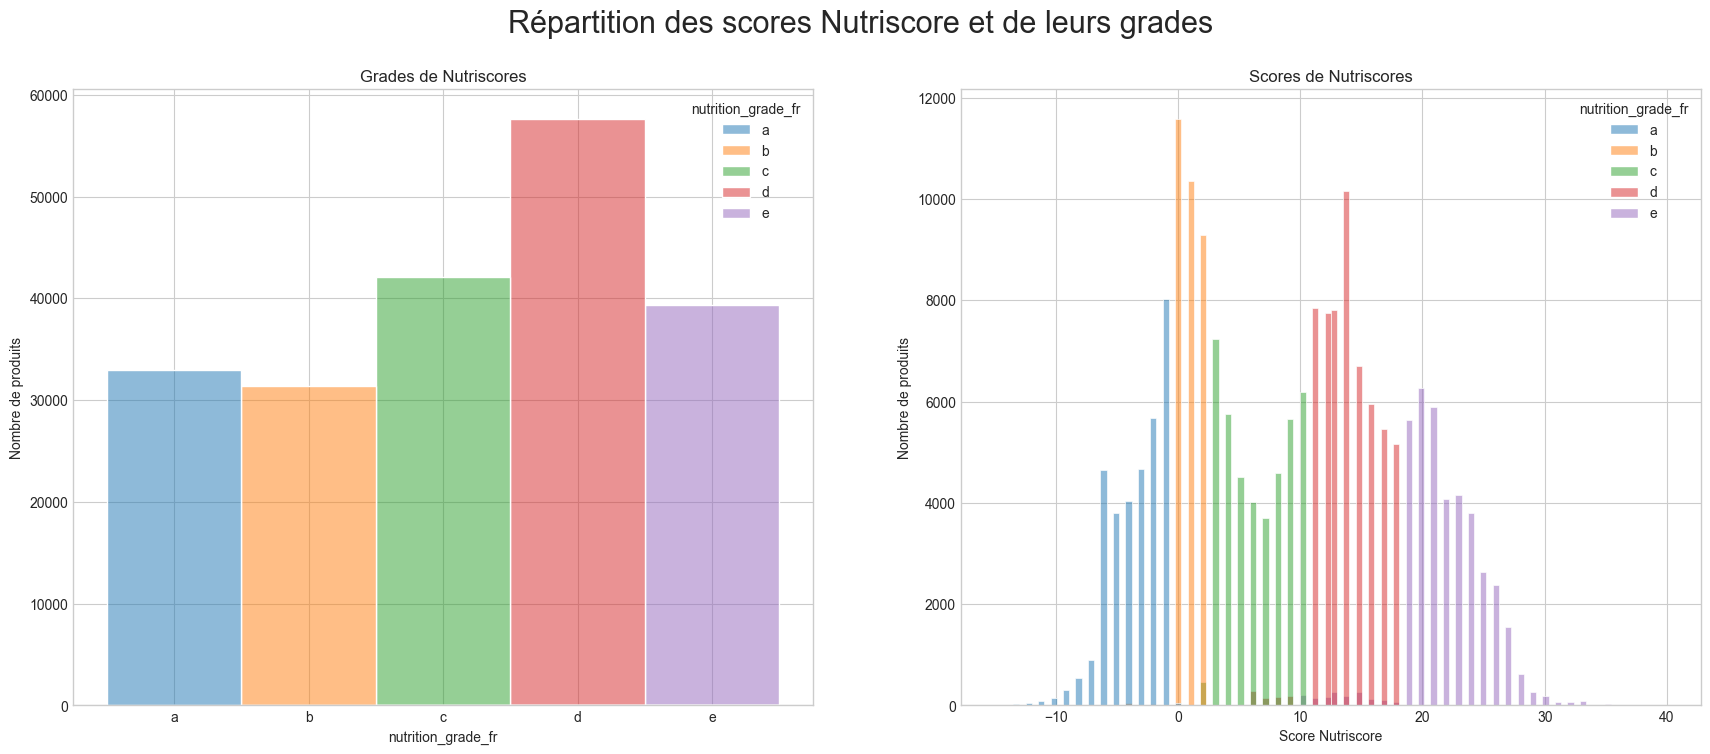

In [55]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(21,8))
fig.suptitle(r"Répartition des scores Nutriscore et de leurs grades" "\n", fontsize=22)

sns.histplot(data=df_nutriscore.sort_values("nutrition_grade_fr"), x="nutrition_grade_fr", hue="nutrition_grade_fr", ax=axes[0])
axes[0].set_title('Grades de Nutriscores')
axes[0].set_xlabel("nutrition_grade_fr")
axes[0].set_ylabel("Nombre de produits")

sns.histplot(data=df_nutriscore.sort_values("nutrition_grade_fr"), x="nutrition_score_fr_100g", hue="nutrition_grade_fr", ax=axes[1])
axes[1].set_title('Scores de Nutriscores')
axes[1].set_xlabel("Score Nutriscore")
axes[1].set_ylabel("Nombre de produits")

plt.show()

- **nutrigrade** : 
    - La répartition du nombre de produits en fonction de leur appartenance a un groupe Grade de Nutriscore est :
        - Le groupe de produit d est le plus nombreux
            - Les produits considérés comme a surveillés sont bien représenté (d et e)
        - Les 5 groupes sont présents
    - Concernant les scores entre -15 et 40 : 
        - Les scores les plus représentés sont en entre 0 et 5
        - Pic autour des 15 (grade d)
        - Les grade sont bien représentatifs des scores et sont plutôt diversifiés

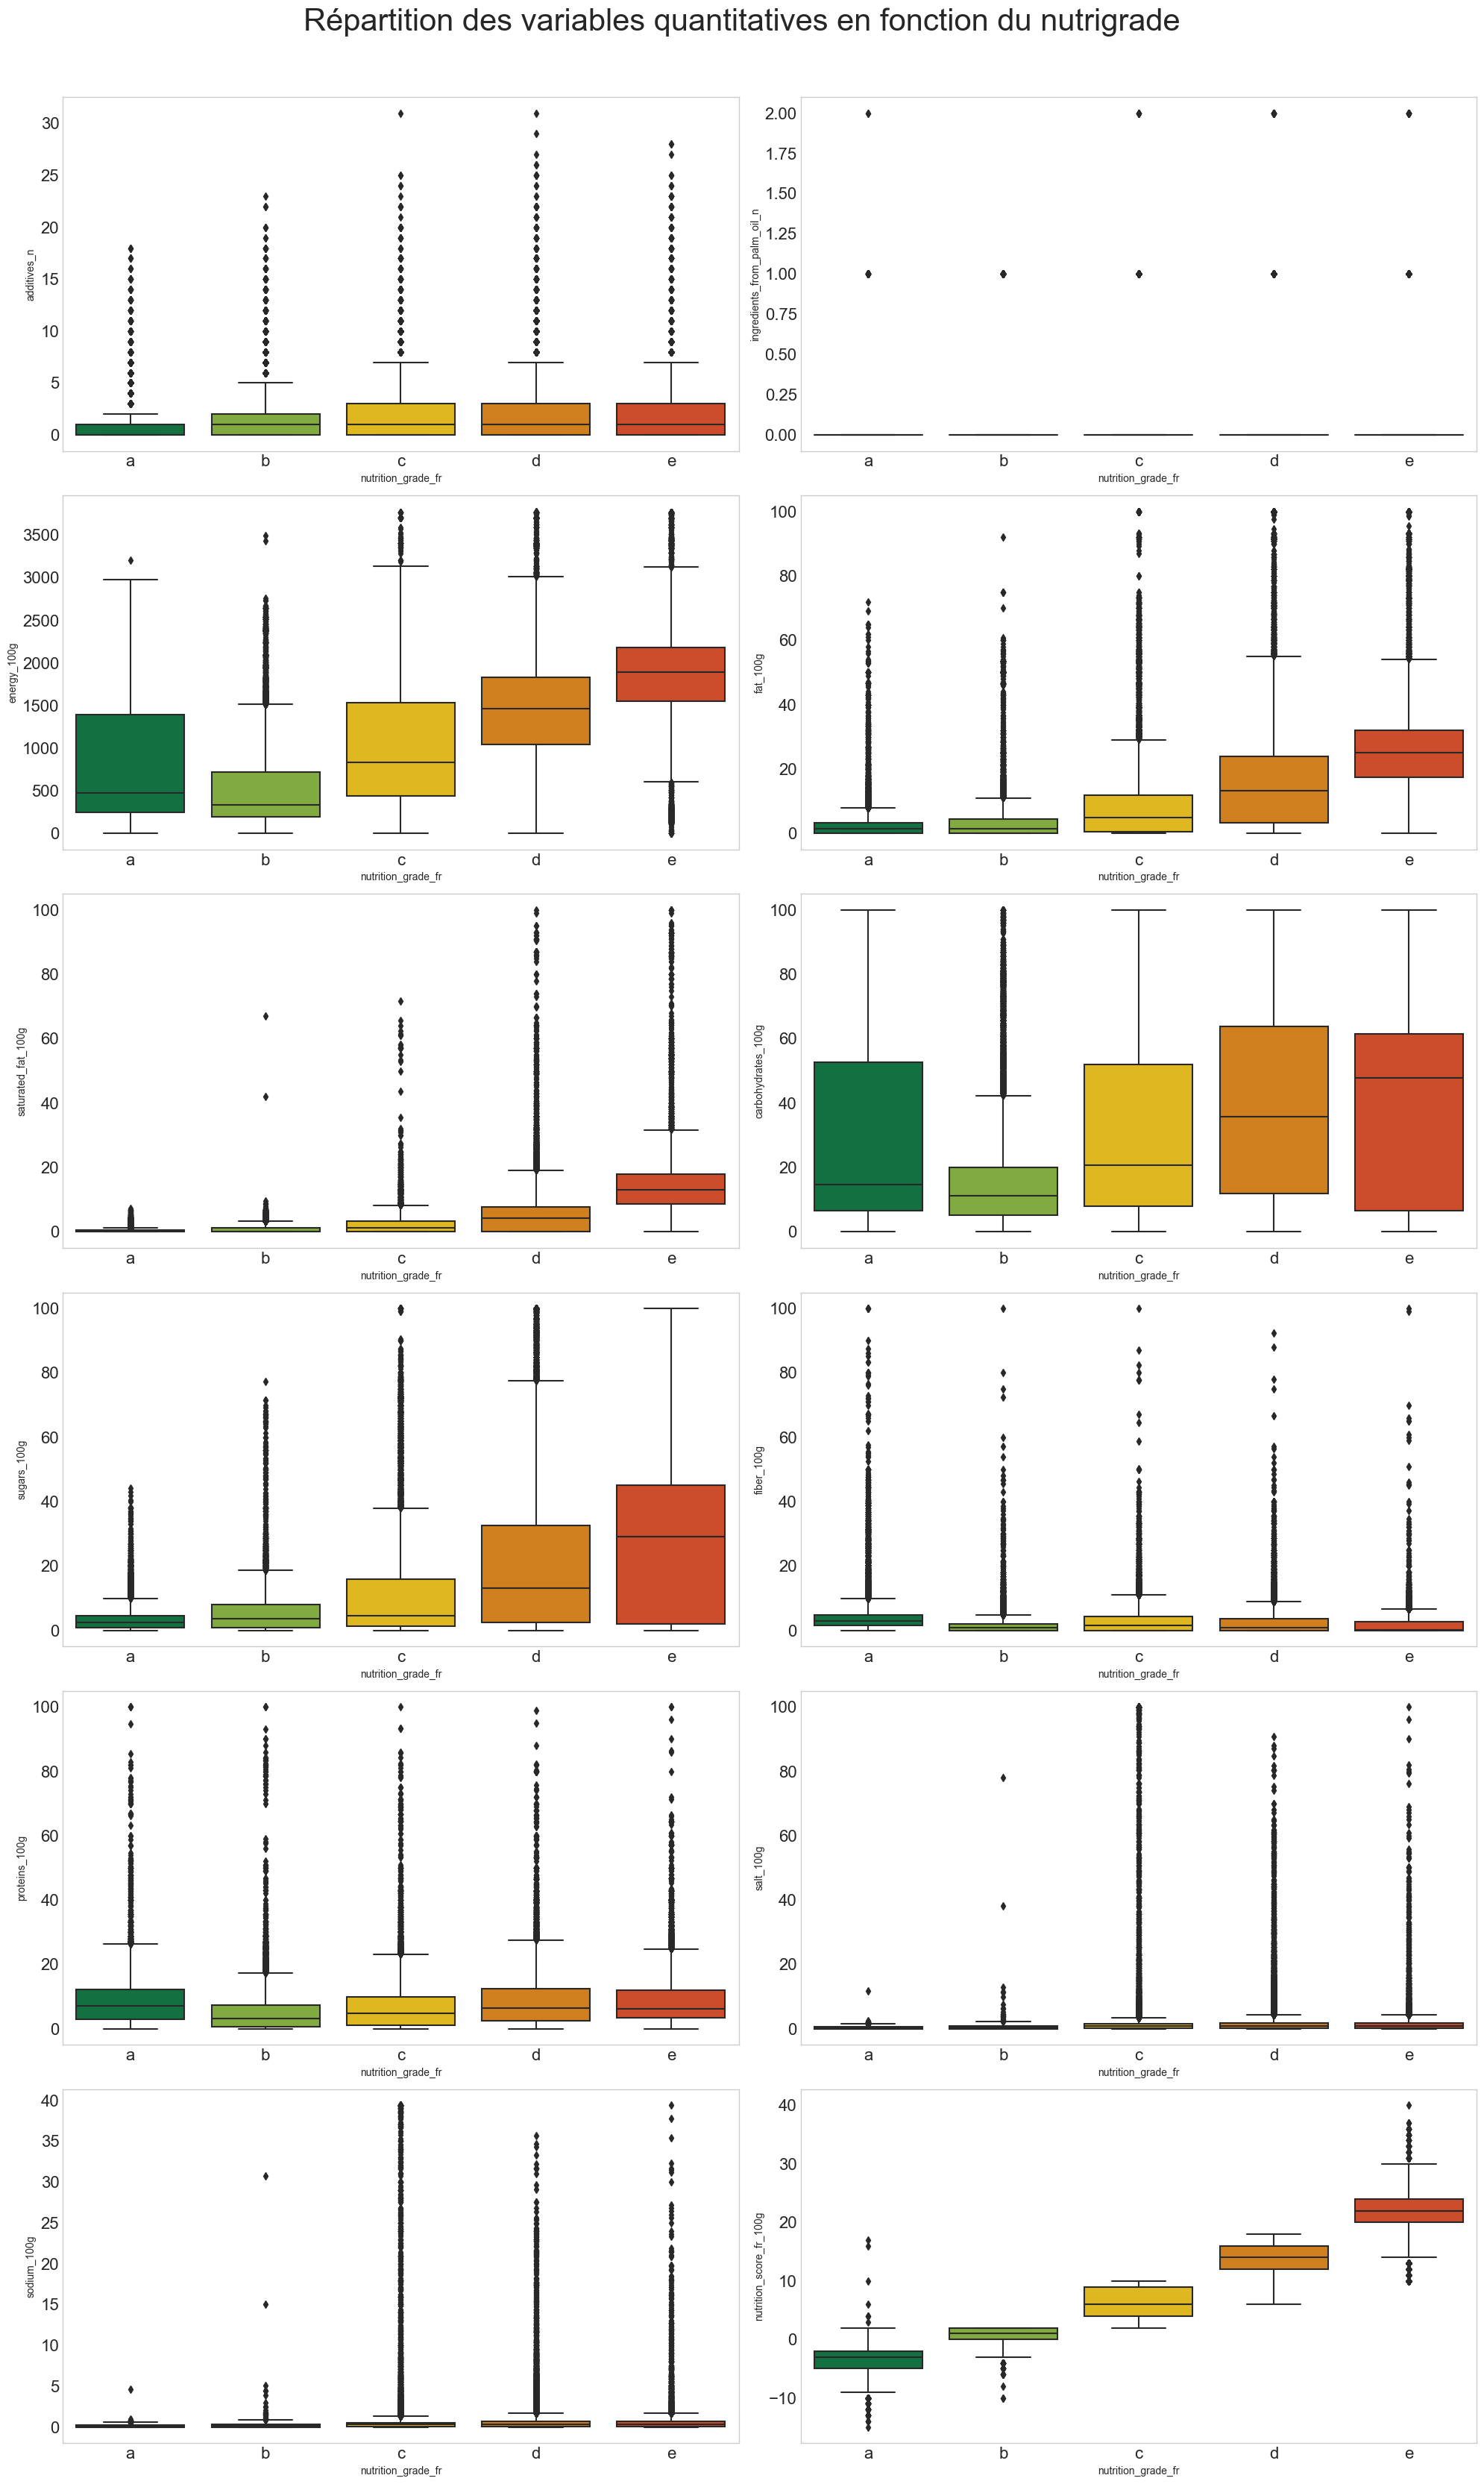

In [57]:
# Répartition des variables quantitative en fonction du nutrigrade
colors_nutri = ['#038141','#85bb2f','#fecb02','#ee8100','#e63e11']
fig = plt.figure(figsize=(20, 35))

for i, c in enumerate(df_nutriscore.select_dtypes('float'), 1):
    ax = fig.add_subplot(6, 2, i)
    sns.boxplot(data=df_nutriscore, x='nutrition_grade_fr', y=c,order='abcde', ax=ax,palette=colors_nutri)
    plt.grid(False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Répartition des variables quantitatives en fonction du nutrigrade', fontsize=30)
plt.savefig("assets/graphiques/Répartition des variables quantitatives en fonction du nutrigrade.jpg")
plt.show()

- **Répartition générale** : 
    - Les données sont généralement asymétriques, la majorité d'entre elles sont situées sur le côté supérieur ou inférieur du graphique et présentent de nombreux outliers. ***L'asymétrie indique que les données peuvent ne pas être normalement distribuées***.
     - Beaucoup de valeurs atypiques quelque soit le groupe
        - la diversité des produits explique ces résultats
        
- **Energie** : Plus un produit apporte de l'énegie plus il faut surveiller les quantités (classes CDE) 
- **fat, satured-fat** : Plus un produit 
    - Centres : AB peu gras, CDE : plus gras, à surveiller
    - Dispersion  : difference de dispersion CDE
- **Sucres** : 
    - Centres  : Plus un produit contient de sucre plus son nutrigrade augmente
    - Dispersion : beaucoup d'outliers dans les AB mais l'apport de sucre est limité 80g pourt 100g
- **Protéines** :
    - Centres (comparer les médianes) : les médianes sont proches entre les groupes 
    - Dispersion : Très marquées par les outliers
- **Sel** (sodium et sel): Plus un produit contient de sel plus il est à surveiller 
    - Centres (comparer les médianes) : Les produits à éviter et à surveiller font parti de ABC
    - Dispersion : beaucoup de produit très salé appartiennent aux groupes considérés comme à maîtriser : C,D,E
- **Nutri-score** : conforme à la séparation nutrigraded (assez normal).

- On regarde les proteines importantes pour notre application : 
    - Hypothèse plus un produit est considéré comme sain (A, B) moins il contient de protéines 

#### Nutrigrade | Protéines
- Questions : 
    - A quelle point proteins_100g est liée aux categories nutrigrade ?
    - La quantité de protéine est-elle liée au nutrigrade ?

In [93]:
# Préparation des variables de travail pour les graphiques et les tests
gp = df_nutriscore.groupby('nutrition_grade_fr')['proteins_100g']
df_nutrigrade = pd.DataFrame([gp.get_group(n).values for n in list('abcde')],
                             index=list('abcde')).T
df_nutrigrade = df_nutrigrade.dropna()
df_a = df_nutrigrade['a']
df_b = df_nutrigrade['b']
df_c = df_nutrigrade['c']
df_d = df_nutrigrade['d']
df_e = df_nutrigrade['e']

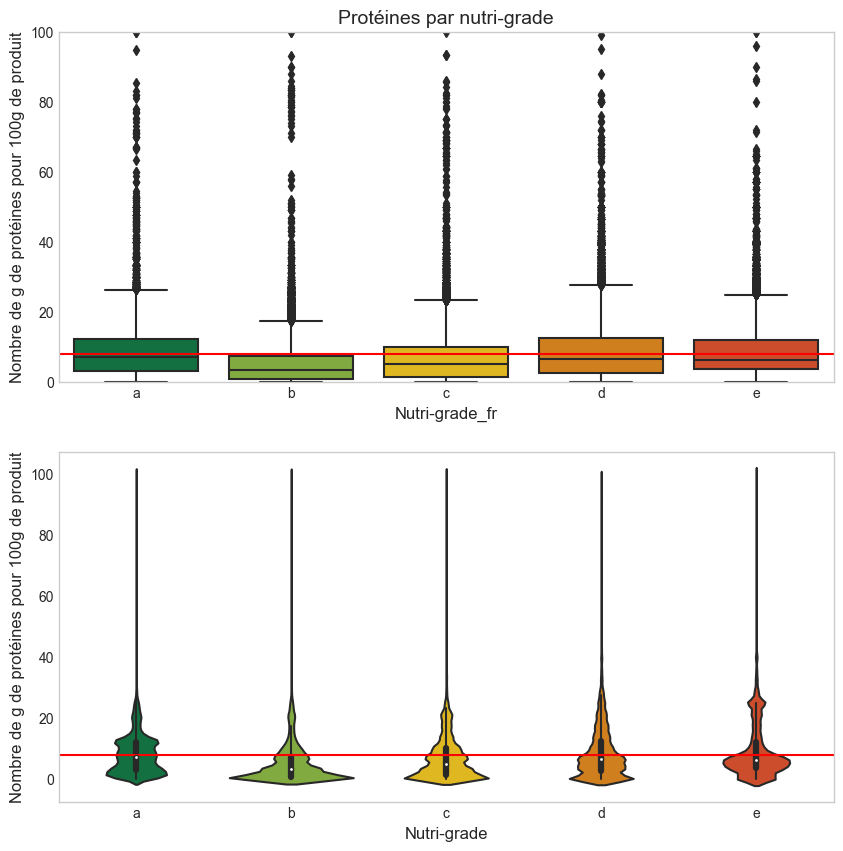

In [95]:
plt.figure(figsize=[10, 10])
# colors_nutri = ['#038141','#85bb2f','#fecb02','#ee8100','#e63e11']
# Boxplot protéines/nutri-score grade
plt.subplot(2, 1, 1)
sns.boxplot(data=df_nutriscore, x='nutrition_grade_fr', y='proteins_100g',
            palette=colors_nutri, order='abcde')
plt.ylim(0, 100)
plt.ylabel('Nombre de g de protéines pour 100g de produit', fontsize=12)
plt.xlabel('Nutri-grade_fr', fontsize=12)
plt.title('Protéines par nutri-grade', fontsize=14)
plt.grid(False)
# Ajout moyenne des protéines pour tous les produits
moyenne_proteines = df_nutriscore['proteins_100g'].mean()
plt.axhline(y=moyenne_proteines, color='r')

# Violinplot protéines/nutri-score grade
plt.subplot(2, 1, 2)
sns.violinplot(data=df_nutriscore, x='nutrition_grade_fr', y='proteins_100g',
               palette=colors_nutri, order='abcde')
plt.ylabel('Nombre de g de protéines pour 100g de produit', fontsize=12)
plt.xlabel('Nutri-grade', fontsize=12)
plt.grid(False)
# Ajout moyenne des protéines pour tous les produits
plt.axhline(y=moyenne_proteines, color='r')

plt.show()

- amplitude en 0 et 100g de protéines
- pas de correlation entre nutrigrade et nombre de protéine pour 100g 

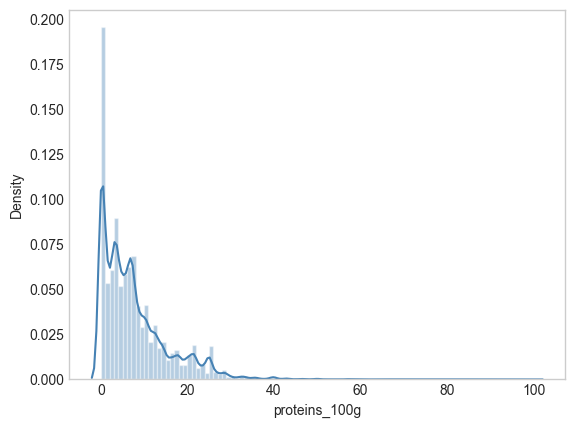

In [96]:
# Distplot protéines
sns.distplot(df_nutriscore['proteins_100g'], bins=100, color='SteelBlue')
plt.grid(False)

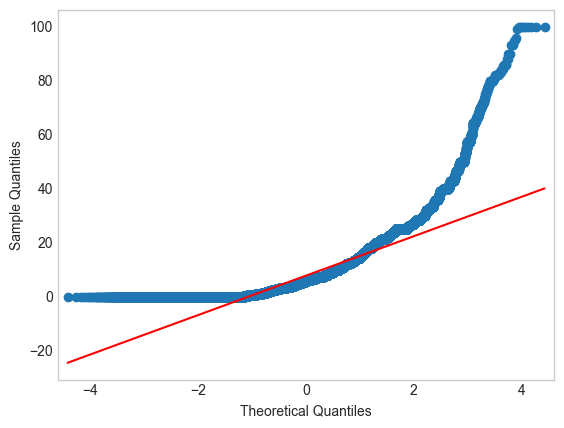

In [97]:
qqplot(df_nutriscore['proteins_100g'], line='r')
plt.grid(False)
plt.show()

- amplitude en 0 et 100g de protéines
- pas de correlation entre nutrigrade et nombre de protéine pour 100g 
- La distribution ne semble pas normal ==> tests pour confirmer

In [98]:
# Statistiques descriptives
tools.stat_descriptives(df_nutriscore, ['proteins_100g'])

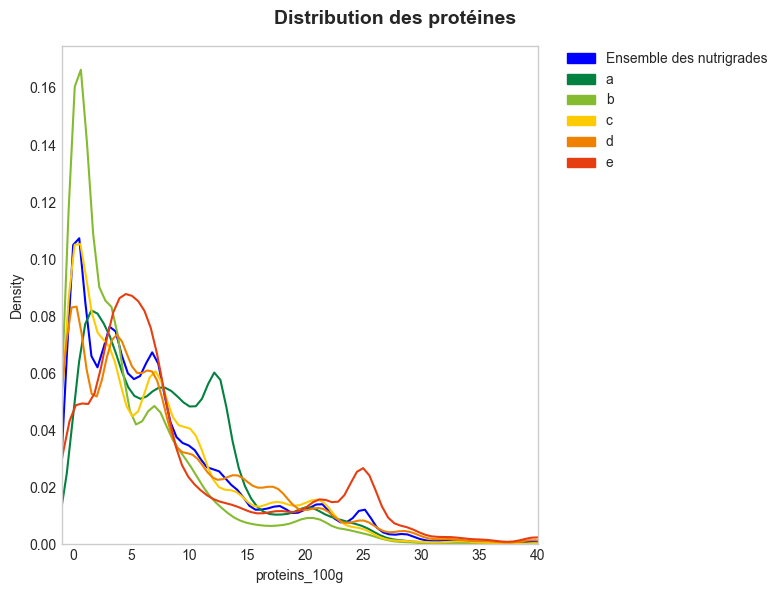

In [156]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(8, 6))
label_patches = []

sns.kdeplot(df_nutriscore['proteins_100g'], color='Blue')
label_patch = mpatches.Patch(
    color='Blue',
    label='Ensemble des nutrigrades')
label_patches.append(label_patch)
plt.grid(False)
plt.xlim([-1, 40])

i = 1
for n, c in zip(list('abcde'), colors_nutri):
    i += 1
    sns.kdeplot(df_nutrigrade[n], color=c)
    label_patch = mpatches.Patch(color=c, label=n)
    label_patches.append(label_patch)
    plt.grid(False)
    plt.xlim([-1, 40])

fig.suptitle('Distribution des protéines', fontweight='bold', fontsize=14)
plt.legend(handles=label_patches,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0., facecolor='white')
plt.tight_layout()
plt.grid(False)
plt.show()

In [157]:
liste_bins = pd.IntervalIndex.from_tuples(
    [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29),
     (30, 34), (35, 39), (40, 100)])
tools.distribution_variables_plages_perc_donnees(df_nutriscore, 'proteins_100g', liste_bins)

In [158]:
df_nutriscore['proteins_100g'].describe()

count    203405.000000
mean          7.782852
std           8.036600
min           0.000000
25%           2.000000
50%           5.710000
75%          10.710000
max         100.000000
Name: proteins_100g, dtype: float64

- Test ANOVA est-il possible ?
- Conditions : 
    - Observations indépendantes
    - Données distribuées normalement : test Shapiro Wilks, qqplot
    - Pas de données extrême
    - Variance des groupes à peu près égale
    - Effectifs des groupes proche
    
==> L'Anova n'est pas réalisables car notre échantillon ne remplit pas les conditions néanmoins on pousse l'analyse à titre informatif

##### Tester la normalité

In [108]:
# Test de Shapiro-Wilk
shapiro(df_nutriscore['proteins_100g'])

ShapiroResult(statistic=0.8269742131233215, pvalue=0.0)

- amplitude en 0 et 100g de protéines
- pas de correlations flagrantes entre nutrigrade et nombre de protéine pour 100g 
- On rertrouve dans toutes les plages toutes les notes du nutrtion grade
- 75% des variables contiennent 11g de proteines
CCL : **Rappel de l'hypothèse :** plus un produit est considéré comme sain (A, B) moins il contient de protéines = fausse
- Questions : 
    - A quelle point proteins_100g est liée aux categories nutrigrade ?
    - La quantité de protéine est-elle liée au nutrigrade ?

Le test de Shapiro-Wilk est un test de normalité. Il est utilisé pour déterminer si un échantillon provient ou non d'une distribution normale.

**Hypothèses** : 
- H0 : la distribution des données est normale (P>0,05)
- H1 : la distribution des données n'est pas normale (P<0,05)
***
Comme **la valeur p est inférieure à 0,05, nous rejetons l'hypothèse nulle. les données de l'échantillon ne proviennent pas d'une distribution normale.**

In [110]:
# Test de normalité basé sur D’Agostino and Pearson’s
stat, p = normaltest(df_nutri['proteins_100g'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0 peut être rejetée - H1 : la distribution des données n'est pas normale (P<0,05) ")
else:
    print("H0 ne peut être rejetée - la distribution des données est normale (P>0,05)")

Statistics=90840.247, p=0.000
H0 peut être rejetée - H1 : la distribution des données n'est pas normale (P<0,05) 


Confirmation

Puisque **la valeur p est inférieure à 0,05, nous rejetons l'hypothèse nulle**. Nous avons suffisamment de preuves pour affirmer que **les données de l'échantillon ne proviennent pas d'une distribution normale.**

##### ANOVA pour l'expérience

In [159]:
# Anova OLS
anova_nutrigrade = smf.ols('proteins_100g~nutrition_grade_fr', data=df_nutriscore).fit()
print(anova_nutrigrade.summary())

                            OLS Regression Results                            
Dep. Variable:          proteins_100g   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1491.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:51:37   Log-Likelihood:            -7.0958e+05
No. Observations:              203405   AIC:                         1.419e+06
Df Residuals:                  203400   BIC:                         1.419e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

- **R² et R² ajusted** : SCE/SCT, sont inférieurs à 5% : 0.028 : la variable explicative nutrition_grade_fr n'est pas pertinentes pour expliquer proteins_100g
- **Omnibus** : Une valeur proche de zero indique que les données suivent une loi Normal
    - Prob(Obminbus) : Confirme que les données ne suivent pas une loi normale (proche de 1) mais dans notre ici 0.000
- **Caractéristiques de forme**
    - **Coefficient d'applatissement Kurtosis** : 11.242

In [125]:
# ANOVA à un facteur avec Kruskall-Wallis test - pour la demarche
f_val, p_val = st.kruskal(df_a,df_b,df_c, df_d,df_e)
print(f'Kruskall-Wallis resultats: F={f_val}, P_value={p_val}\n')
print('Probablement les mêmes moyennes') if p_val > 0.05 else print('Probablement pas les mêmes moyennes')

Kruskall-Wallis resultats: F=7328.344447658513, P_value=0.0

Probablement pas les mêmes moyennes


In [126]:
from scipy import stats
f_val, p_val = stats.f_oneway(df_a, df_b, df_c,
                              df_d, df_e)
print(f'ANOVA resultats: F={f_val}, P_value={p_val}\n')
print('Probablement les mêmes moyennes') if p_val > 0.05 else print('Probablement pas les mêmes moyennes')

ANOVA resultats: F=1423.6518852859235, P_value=0.0

Probablement pas les mêmes moyennes


In [127]:
# Calcule de l'ETA_squared
def eta_squared(x, y):
    moyenne_y = y.mean()
    nutris = []
    for nutri in x.unique():
        yi_nutri = y[x == nutri]
        nutris.append({'ni': len(yi_nutri),
                       'moyenne_nutri': yi_nutri.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_nutri']-moyenne_y)**2 for c in nutris])
    return SCE/SCT

In [128]:
# si eta_squared est proche de 0 alors les moyennes des protéines par nutri-score sont toutes égales
X = 'nutrition_grade_fr'  # qualitative
Y = 'proteins_100g'  # quantitative

eta_squared(df_nutri[X], df_nutri[Y])

0.028492444862650193

si eta_squared est proche de 0 alors les moyennes des protéines par nutri-score sont toutes égales

**CONCLUSION** : Faible relation entre la variable protein et le nutrigrade mais il existe une relation

In [167]:
df_test = df_nutriscore.copy()
# on ajoute une colonne corespondant à la labelEncoder de la variable nutrigrade
le = preprocessing.LabelEncoder()
le.fit(["a", "b", "c", "d","e"])
df_test['nutrition_grade_fr_le'] = le.transform(df_test['nutrition_grade_fr'])

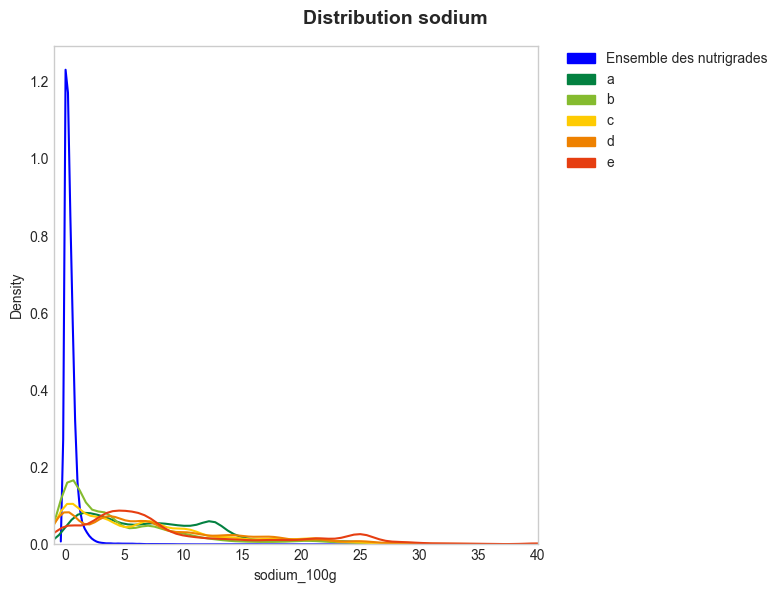

In [199]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(8, 6))
label_patches = []

sns.kdeplot(df_nutriscore['sodium_100g'], color='Blue')
label_patch = mpatches.Patch(
    color='Blue',
    label='Ensemble des nutrigrades')
label_patches.append(label_patch)
plt.grid(False)
plt.xlim([-1, 40])

i = 1
for n, c in zip(list('abcde'), colors_nutri):
    i += 1
    sns.kdeplot(df_nutrigrade[n], color=c)
    label_patch = mpatches.Patch(color=c, label=n)
    label_patches.append(label_patch)
    plt.grid(False)
    plt.xlim([-1, 40])

fig.suptitle('Distribution sodium', fontweight='bold', fontsize=14)
plt.legend(handles=label_patches,bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0., facecolor='white')
plt.tight_layout()
plt.grid(False)
plt.show()

In [201]:
df_nutriscore['sodium_100g'].describe()

count    203405.000000
mean          0.490369
std           1.556126
min           0.000000
25%           0.039370
50%           0.256000
75%           0.536000
max          39.370079
Name: sodium_100g, dtype: float64

In [202]:
liste_bins = pd.IntervalIndex.from_tuples(
    [(0, 0.2), (0.3, 0.5), (0.5, 0.7), (0.8, 1), (1.1, 1.5), (1.6, 2.5),
     (2.6, 3), (3, 4), (4, 40)])
tools.distribution_variables_plages_perc_donnees(df_nutriscore, 'sodium_100g', liste_bins)

- La majorité des produit sont entre 0 et 0.2 g de sodium 
- 75% des données ont des valeur < 0.5

In [203]:
# Anova OLS
anova_nutrigrade = smf.ols('sodium_100g~nutrition_grade_fr', data=df_nutriscore).fit()
print(anova_nutrigrade.summary())

                            OLS Regression Results                            
Dep. Variable:            sodium_100g   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1056.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:21:39   Log-Likelihood:            -3.7647e+05
No. Observations:              203405   AIC:                         7.530e+05
Df Residuals:                  203400   BIC:                         7.530e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [204]:
# ANOVA à un facteur avec Kruskall-Wallis test - pour la demarche
f_val, p_val = st.kruskal(df_a,df_b,df_c, df_d,df_e)
print(f'Kruskall-Wallis resultats: F={f_val}, P_value={p_val}\n')
print('Probablement les mêmes moyennes') if p_val > 0.05 else print('Probablement pas les mêmes moyennes')

Kruskall-Wallis resultats: F=7328.344447658513, P_value=0.0

Probablement pas les mêmes moyennes


# **ANALYSE MULTIVARIEE**

## Regression linéaire multiple
Quelles éléments expliquent le nutrigrade ?

In [169]:
df_test.columns

Index(['code', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'categories_fr', 'countries_fr',
       'additives_n', 'additives_fr', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g',
       'nutrition_grade_fr_le'],
      dtype='object')

L'objectif est d'utiliser l'agorithme backward pour connaitre le nombre de variables nécéssaires pour déterminer le nutrigrade. 

Ainsi on verra quellles variables sont déterminantes.

In [184]:
def backward_selected(data, response):
    """Linear model designed by backward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by backward selection
           evaluated by parameters p-value
    """
    remaining = set(data._get_numeric_data().columns)
    if response in remaining:
        remaining.remove(response)
    cond = True

    while remaining and cond:
        formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
        print('_______________________________')
        print(formula)
        model = smf.ols(formula, data).fit()
        score = model.pvalues[1:]
        toRemove = score[score == score.max()]
        if toRemove.values > 0.05:
            print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
            remaining.remove(toRemove.index[0])
        else:
            cond = False
            print('is the final model !')
        print('')
    print(model.summary())
    
    return model

In [197]:
# Intanciation de la régression linéaire multiple
colonnes = ['nutrition_grade_fr_le','nutrition_score_fr_100g','main_category_fr', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'sodium_100g','salt_100g']
reg_backward = backward_selected(df_test[colonnes], 'nutrition_grade_fr_le')

_______________________________
nutrition_grade_fr_le ~ fat_100g + fiber_100g + proteins_100g + sugars_100g + salt_100g + carbohydrates_100g + nutrition_score_fr_100g + saturated_fat_100g + energy_100g + sodium_100g + 1
remove salt_100g (p-value : 0.209 )

_______________________________
nutrition_grade_fr_le ~ fat_100g + fiber_100g + proteins_100g + sugars_100g + carbohydrates_100g + nutrition_score_fr_100g + saturated_fat_100g + energy_100g + sodium_100g + 1
is the final model !

                              OLS Regression Results                             
Dep. Variable:     nutrition_grade_fr_le   R-squared:                       0.920
Model:                               OLS   Adj. R-squared:                  0.920
Method:                    Least Squares   F-statistic:                 2.589e+05
Date:                   Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:14:53   Log-Likelihood:                -93132.
No. Observations:    

Toutes les variables sont nécéssaires à par le sel d'après cette algorithme.

On regarde maintenant qu'elle est l'importance du nutrition_score

In [198]:
# On cherche l'élément qui explique le mieux le nutrigrade
anova_nutrigrade = smf.ols('nutrition_grade_fr_le~nutrition_score_fr_100g', data=df_test).fit()
print(anova_nutrigrade.summary())

                              OLS Regression Results                             
Dep. Variable:     nutrition_grade_fr_le   R-squared:                       0.916
Model:                               OLS   Adj. R-squared:                  0.916
Method:                    Least Squares   F-statistic:                 2.211e+06
Date:                   Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:15:13   Log-Likelihood:                -98032.
No. Observations:                 203405   AIC:                         1.961e+05
Df Residuals:                     203403   BIC:                         1.961e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

- **C'est essentiellement le nutrtion score qui explique l'appartenance au nutrigrade**

## Analyse en Composantes Principales (ACP)

In [281]:
df_acp = df_nutriscore.copy()

In [282]:
df_acp.columns

Index(['code', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'categories_fr', 'countries_fr',
       'additives_n', 'additives_fr', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g'],
      dtype='object')

In [283]:
cols_acp = ['energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g',
           'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g','nutrition_score_fr_100g']

In [284]:
#Centrage et réduction
X = df_acp[cols_acp]
X_scaled = scaler.fit_transform(X)

#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled)

**Eboulis des valeurs propres**
Afin d'avoir un aperçu du nombre de composantes nécessaire à l'analyse, nous allons projeter l'éboulis des valeurs propres :

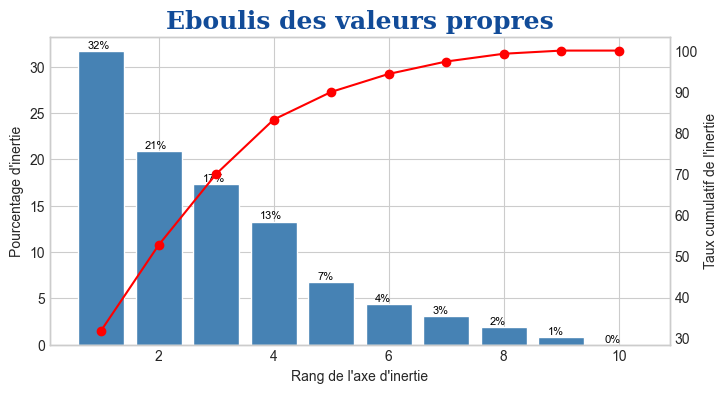

In [408]:
#Projection de l'éboulis des valeurs propres
taux_var_exp = pca.explained_variance_ratio_
scree = taux_var_exp * 100
plt.bar(np.arange(len(scree)) + 1, scree, color='SteelBlue')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(np.arange(len(scree)) + 1, scree.cumsum(), c='red', marker='o')
ax2.set_ylabel('Taux cumulatif de l\'inertie')
ax1.set_xlabel('Rang de l\'axe d\'inertie')
ax1.set_ylabel('Pourcentage d\'inertie')
for i, p in enumerate(ax1.patches):
    ax1.text(p.get_width() /
             5 +
             p.get_x(),
             p.get_height() +
             p.get_y() +
             0.3,
             '{:.0f}%'.format(taux_var_exp[i] *100),
             fontsize=8,color='k')
plt.title("Eboulis des valeurs propres", fontdict=font_title)
plt.gcf().set_size_inches(8, 4)
plt.grid(False)
plt.show(block=False)

In [409]:
print("Le premier plan factoriel couvre une inertie de {:.2f}% et le second plan : {:.2f}%.".format(varexpl[0:2].sum(),
                                                                                                     varexpl[0:4].sum()))

Le premier plan factoriel couvre une inertie de 52.53% et le second plan : 83.15%.


Les 2 premiers plans factoriels couvrent une inertie d'un peu plus de 83,15%. Une analyse sur F1 et F2 semble donc cohérente.

**Projection sur le cercle des corrélations**

In [287]:
#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'feature':X.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3]})
corr_matrix

feature   CORR_F1   CORR_F2   CORR_F3   CORR_F4
0              energy_100g  0.919577 -0.055475  0.003847  0.212015
1                 fat_100g  0.777394  0.143944 -0.411599 -0.055548
2       saturated_fat_100g  0.752975  0.107812 -0.317509 -0.285934
3       carbohydrates_100g  0.413601 -0.334804  0.665704  0.353578
4              sugars_100g  0.436849 -0.368174  0.683280 -0.136313
5               fiber_100g  0.182201 -0.068756 -0.036149  0.861720
6            proteins_100g  0.252664  0.264638 -0.510740  0.429292
7                salt_100g  0.001630  0.926159  0.369268  0.057356
8              sodium_100g  0.001721  0.926165  0.369262  0.057372
9  nutrition_score_fr_100g  0.830060  0.120236  0.139848 -0.347973

In [288]:
#Variable Illustrative
ivNutrigrade = df_acp['nutrition_grade_fr'].values

#Encodage des grades pour l'acp
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ivNutrigrade = encoder.fit_transform(ivNutrigrade)
ivNutrigrade = ivNutrigrade.reshape((ivNutrigrade.shape[0],1))

#Corrélation de la variable illustrative avec les axes factoriels 
corrIv = np.zeros((ivNutrigrade.shape[1],p))
for j in range(p): 
    for k in range(ivNutrigrade.shape[1]): 
        corrIv[k,j] = np.corrcoef(ivNutrigrade[:,k],X_projected[:,j])[0,1]

In [403]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0, 
               illustrative_var_label=None, illustrative_var_corr=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig=plt.figure(figsize=(10,10))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 
            ax.set_facecolor("ivory")

            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="black", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                plt.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="black", alpha=0.8) 

            #variable illustrative
            if illustrative_var_label is not None :
                plt.annotate(illustrative_var_label,
                             (illustrative_var_corr[0,d1],illustrative_var_corr[0,d2]),
                             color='b')
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                                   illustrative_var_corr[0,d1],illustrative_var_corr[0,d2], 
                                   angles='xy', scale_units='xy', scale=1, color="b", alpha=0.5)

            #ajouter les axes 
            plt.plot([-1,1],[0,0],linewidth=1, color='black', ls='--') 
            plt.plot([0,0],[-1,1],linewidth=1, color='black', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='steelblue',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)

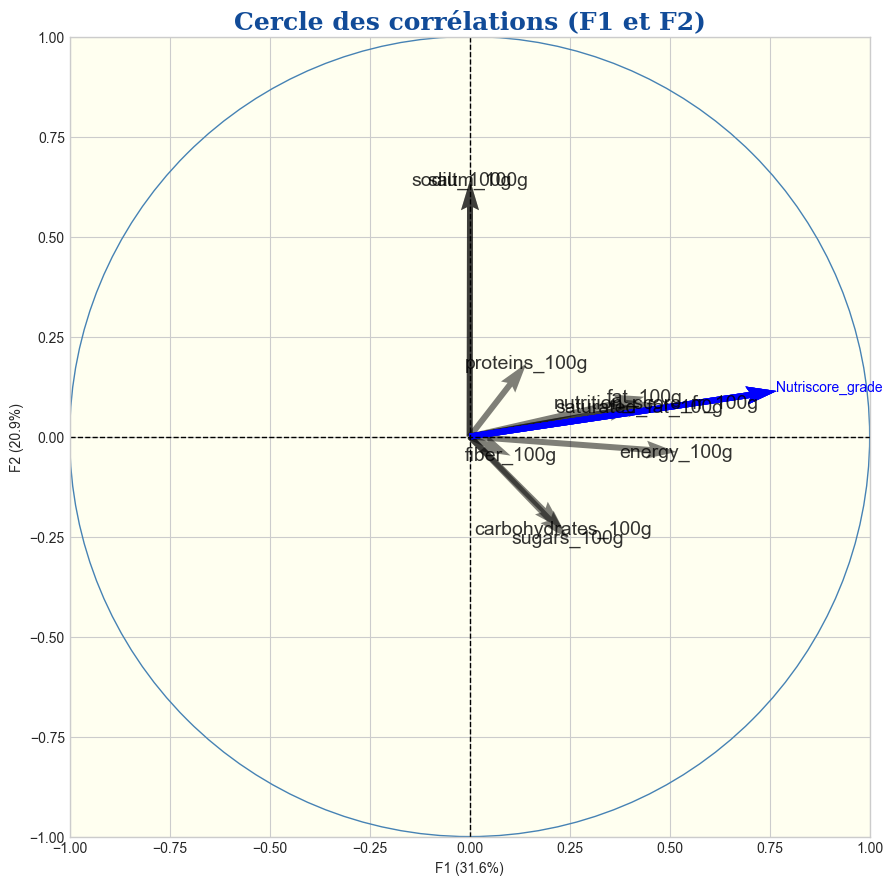

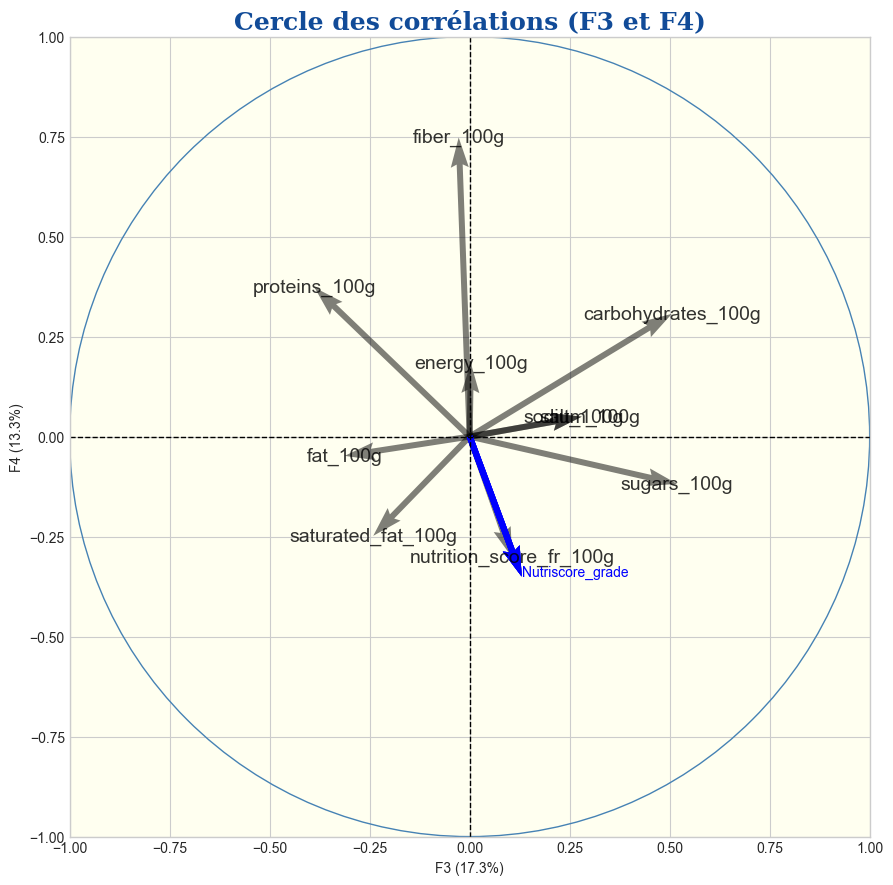

In [404]:
cerle_corr(pcs, 4, pca, [(0,1),(2,3)], labels = np.array(X.columns), 
           illustrative_var_label="Nutriscore_grade", illustrative_var_corr = corrIv)

Projection des produits sur les plans factoriels
- Visualiser la projection des individus sur ces premiers plans factoriels et donc en 2D :

***
Bilan
***
On retrouve les corrélations entre les glucides et le sucre, les lipides et les acides gras saturés.
Mêmes conclusions qu'avec l'analyse multi-variée :
Les lipides augmente sans surprise avec les acides gras saturés (un sous-groupe des lipides). Les produits à forte teneur en lipides ont tendance à contenir moins de glucides, de fibres et d'additifs.
Les produits avec une forte teneur en glucides ont tendance à avoir moins de lipdes, de sel et moins de protéines.
Les produits à forte teneur en protéines ont une tendance à contenir moins de glucides, moins d'additifs et moins d'ingrédients contenant de l'huile de palme. Plus le produit contient des protéines moins le produit est transformé.
Les additifs sont très présents dans les produits très ou ultra transformés.
Les produits les moins transformés contiennent plus de fibres et de protéines.
L'énrgie nutritionnelle augmente avec les produits contenant des lipdes et des glucides et plus l'énergie est élevée plus le nutri-score est élevé (donc le produit est mal noté).les produits contenant plus de protéines contiennent moins de glucides.
Le premier axe représente la partie concentration de l'énergie nutritionnelle
Le second axe représente les nutriments (protéines, glucides, lipides , additifs...).
Le troisième axe représente les additifs et ingrédients avec huile de palme.
Le quatrième axe représente les fibres.

In [396]:
def plot_plans_factoriels_nutrigrade(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                label_patches = []
                colors = ['#038141', '#85bb2f', '#fecb02', '#ee8100', '#e63e11']
                i = 0
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=colors[i])
                    label_patch = mpatches.Patch(color=colors[i],
                                                 label=value)
                    label_patches.append(label_patch)
                    i += 1
                    plt.legend(
                        handles=label_patches,
                        bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.,facecolor='white')
               # plt.legend()
                

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                    
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]]))*1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)

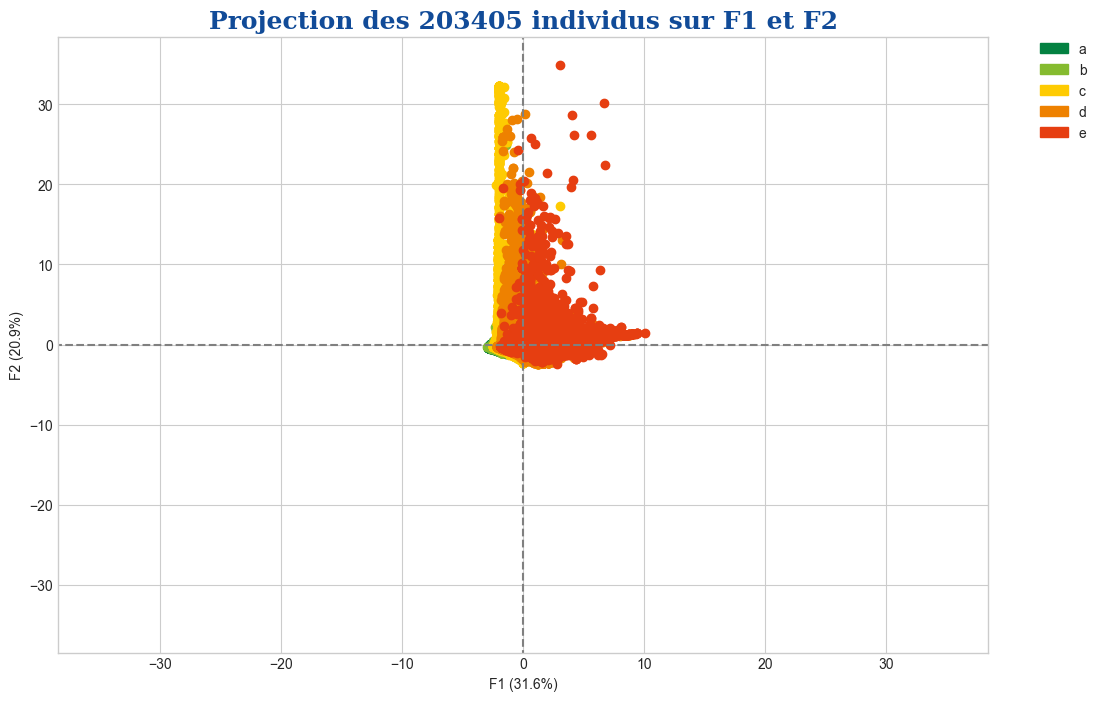

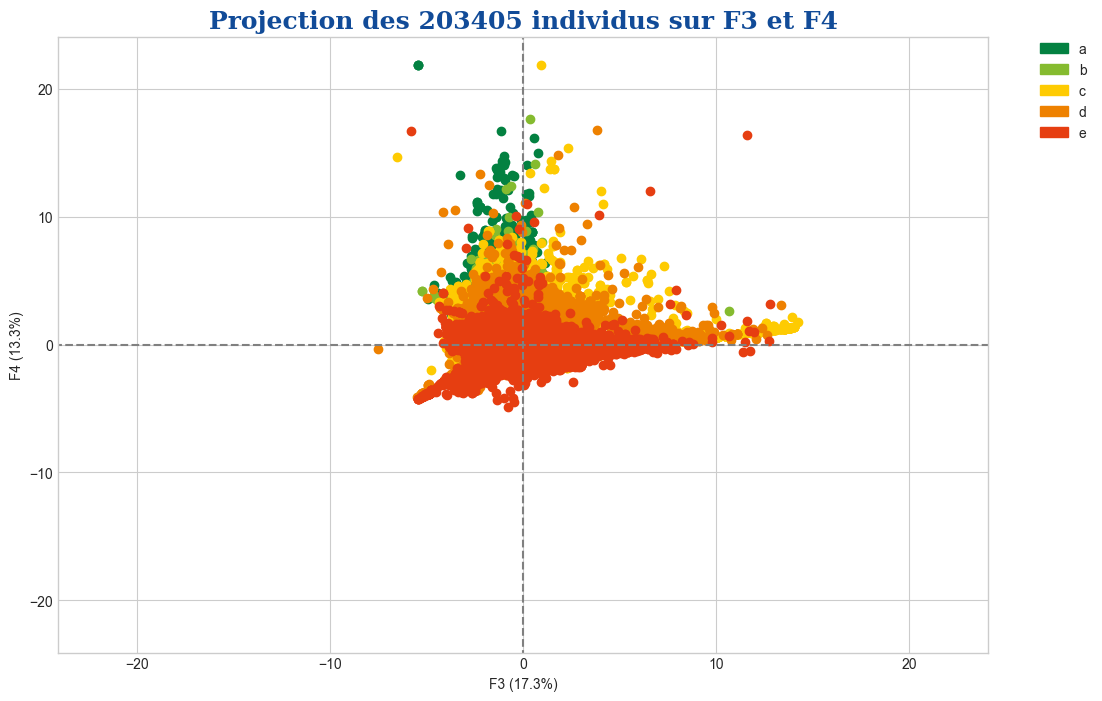

In [397]:
plot_plans_factoriels_nutrigrade(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = df_nutriscore['nutrition_grade_fr'])

In [394]:
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                    
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]]))*1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)

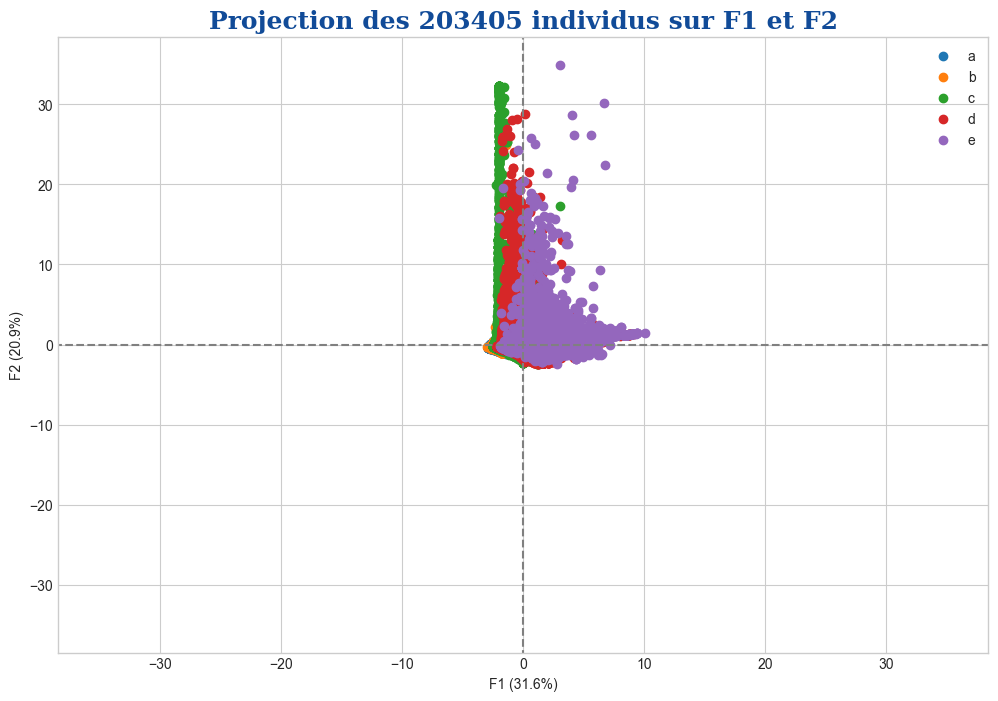

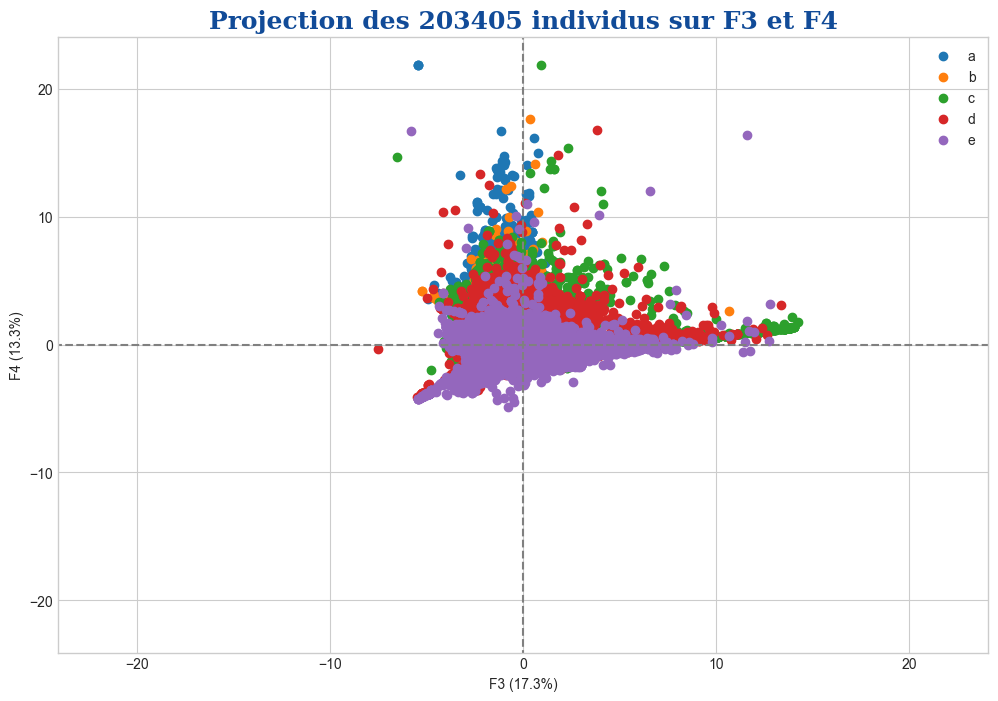

In [400]:
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = df_nutriscore['nutrition_grade_fr'])